<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#045F5F"> <b>Machine Learning (Spring 2022)</b><br><br>Hands-On 6</i></font></h1>
            </td>
            <td style="border: none!important;">
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
            </td>
        </tr>
        </table>
    
</div>
<br>
<font size=3 color="#045F5F">Mohammad Mehdi Yadegarifard<br></font><br>


<font color="#e30b5d"><h1>Model Selection</h1></font>

On a high level, Machine Learning is the union of statistics and computation. The crux of machine learning revolves around the concept of algorithms or models which are in fact statistical estimations on steroids.

However, any given model has several limitations depending on the data distribution. None of them can be entirely accurate since they are just **estimations (even if on steroids)**. These limitations are popularly known by the name of **bias** and **variance**. 

A **model with high bias** will oversimplify by not paying much attention to the training points (e.g.: in Linear Regression, irrespective of data distribution, the model will always assume a linear relationship). 

A **model with high variance** will restrict itself to the training data by not generalizing for test points that it hasn’t seen before (e.g.: Random Forest with max_depth = None).

The issue arises when the limitations are subtle, like when we have to choose between a random forest algorithm and a gradient boosting algorithm or between two variations of the same decision tree algorithm. Both will tend to have high variance and low bias.

This is where model selection and model evaluation come into play!

In this article we’ll talk about:

- What are model selection and model evaluation?
- Effective model selection methods (resampling and probabilistic approaches)
- Popular model evaluation methods
- Important Machine Learning model trade-offs

# What are model selection and model evaluation?

**Model evaluation** is a method of assessing the correctness of models on test data. The test data consists of data points that have not been seen by the model before.

**Model selection** is a technique for selecting the best model after the individual models are evaluated based on the required criteria.

## Types of model selection

### Resampling methods

Resampling methods, as the name suggests, are simple techniques of rearranging data samples to inspect if the model performs well on data samples that it has not been trained on. In other words, resampling helps us understand **if the model will generalize well**.

#### Random Split

Random Splits are used to randomly sample a percentage of data into training, testing, and preferably validation sets. The advantage of this method is that there is a good chance that the original population is well represented in all the three sets. In more formal terms, random splitting will prevent a biased sampling of data.

It is very important to note the use of the validation set in model selection. The validation set is the second test set and one might ask, why have two test sets?

In the process of feature selection and model tuning, the test set is used for model evaluation. This means that the model parameters and the feature set are selected such that they give an optimal result on the test set. Thus, the validation set which has completely unseen data points (not been used in the tuning and feature selection modules) is used for the final evaluation.

#### Time-Based Split

There are **some types of data where random splits are not possible**. For example, if we have to train a model for weather forecasting, we cannot randomly divide the data into training and testing sets. This will jumble up the seasonal pattern! Such data is often referred to by the term – Time Series.

In such cases, a time-wise split is used. The training set can have data for the last three years and 10 months of the present year. The last two months can be reserved for the testing or validation set.

There is also a **concept of window sets** – where the model is trained till a particular date and tested on the future dates iteratively such that the training window keeps increasing shifting by one day (consequently, the test set also reduces by a day). The advantage of this method is that it stabilizes the model and prevents overfitting when the test set is very small (say, 3 to 7 days).  

However, the drawback of time-series data is that the events or data points are not mutually independent. One event might affect every data input that follows after. 

For instance, a change in the governing party might considerably change the population statistics for the years to follow. Or the infamous coronavirus pandemic is going to have a massive impact on economic data for the next few years. 

No machine learning model can learn from past data in such a case because the data points before and after the event have major differences.

#### K-Fold Cross-Validation

The cross-validation technique works by **randomly shuffling the dataset and then splitting it into k groups**. Thereafter, on iterating over each group, the group needs to be considered as a test set while all other groups are clubbed together into the training set. The model is tested on the test group and the process continues for k groups.

Thus, by the end of the process, one has k different results on k different test groups. The best model can then be selected easily by choosing the one with the highest score.

#### Stratified K-Fold

The process for stratified K-Fold is similar to that of K-Fold cross-validation with one single point of difference – **unlike in k-fold cross-validation, the values of the target variable is taken into consideration in stratified k-fold**.

If for instance, the target variable is a categorical variable with 2 classes, then stratified k-fold ensures that each test fold gets an equal ratio of the two classes when compared to the training set.

This makes the model evaluation more accurate and the model training less biased.

#### Bootstrap

Bootstrap is one of the most powerful ways to obtain a stabilized model. It is close to the random splitting technique since it follows the concept of random sampling.

The first step is to select a sample size (which is usually equal to the size of the original dataset). Thereafter, a sample data point must be randomly selected from the original dataset and added to the bootstrap sample. After the addition, the sample needs to be put back into the original sample. This process needs to be repeated for N times, where N is the sample size.

Therefore, it is a resampling technique that creates the bootstrap sample by sampling data points from the original dataset **with replacement**. This means that the bootstrap sample can contain multiple instances of the same data point.

The model is trained on the bootstrap sample and then evaluated on all those data points that did not make it to the bootstrapped sample. These are called the **out-of-bag** samples.

### Probabilistic measures

Probabilistic Measures do **not just take into account the model performance but also the model complexity**. Model complexity is the measure of the model’s ability to capture the variance in the data. 

For example, a highly biased model like the linear regression algorithm is less complex and on the other hand, a neural network is very high on complexity.

Another important point to note here is that the **model performance** taken into account in probabilistic measures is **calculated from the training set only**. A hold-out test set is typically not required.

A fair bit of disadvantage however lies in the fact that probabilistic measures do not consider the uncertainty of the models and has a chance of selecting simpler models over complex models.

#### Akaike Information Criterion (AIC)

It is common knowledge that every model is not completely accurate. There is always some information loss which can be measured using the KL information metric. Kulback-Liebler or KL divergence is the measure of the difference in the probability distribution of two variables.

A statistician, Hirotugu Akaike, took into consideration the relationship between KL Information and Maximum Likelihood (in maximum-likelihood, one wishes to maximize the conditional probability of observing a datapoint X, given the parameters and a specified probability distribution) and developed the concept of Information Criterion (or IC). Therefore, Akaike’s IC or AIC is the measure of information loss. This is how the discrepancy between two different models is captured and the model with the least information loss is suggested as the model of choice.

$$AIC=(2K-2log(L))/N$$

- K = number of independent variables or predictors
- L = maximum-likelihood of the model 
- N = number of data points in the training set (especially helpful in case of small datasets)

The limitation of AIC is that it is not very good with generalizing models as it tends to select complex models that lose less training information.

In [3]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd

#read in data
data = pd.read_csv("mtcars.csv")

#view head of data
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
#define response variable
y = data['mpg']

#define predictor variables
x = data[['disp', 'hp', 'wt', 'qsec']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

#view AIC of model
print(model.aic)

157.06960941462438


The AIC of this model turns out to be 157.07.
Next, we’ll fit the second model and calculate the AIC:

In [6]:
#define response variable
y = data['mpg']

#define predictor variables
x = data[['disp', 'qsec']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

#view AIC of model
print(model.aic)

169.84184864154588


The AIC of this model turns out to be 169.84.

Since the first model has a lower AIC value, it is the better fitting model. 

Once we’ve identified this model as the best, we can proceed to fit the model and analyze the results including the R-squared value and the beta coefficients to determine the exact relationship between the set of predictor variables and the response variable.

#### Bayesian Information Criterion (BIC)

BIC was derived from the Bayesian probability concept and is suited for models that are trained under the maximum likelihood estimation.

$$BIC=K*log(N)-2log(L)$$

- K = number of independent variables
- L = maximum-likelihood
- N = Number of sampler/data points in the training set

BIC penalizes the model for its complexity and is preferably used when the size of the dataset is not very small (otherwise it tends to settle on very simple models).

In [7]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd

#read in data
data = pd.read_csv("mtcars.csv")

#view head of data
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
#define response variable
y = data['mpg']

#define predictor variables
x = data[['disp', 'qsec']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

#view BIC of model
print(model.bic)


174.23905634994506


The BIC of this model turns out to be 174.239.

Next, we’ll fit the second model and calculate the BIC:

In [9]:
#define response variable
y = data['mpg']

#define predictor variables
x = data[['disp', 'wt']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

#view BIC of model
print(model.bic)

166.56499196301334


The BIC of this model turns out to be 166.565.

Since the second model has a lower BIC value, it is the better fitting model.


#### Minimum Description Length (MDL)

MDL is derived from the Information theory which deals with quantities such as entropy that measure the average number of bits required to represent an event from a probability distribution or a random variable.

MDL or the minimum description length is the minimum number of such bits required to represent the model.

$$MDL=L(h)+L(D|h)$$

- d = model
- D = predictions made by the model
- L(h) = number of bits required to represent the model
- L(D | h) = number of bits required to represent the predictions from the model

#### Structural Risk Minimization (SRM)

Machine learning models face the inevitable problem of defining a generalized theory from a set of finite data. This leads to cases of overfitting where the model gets biased to the training data which is its primary learning source. SRM tries to balance out the model’s complexity against its success at fitting on the data.

Let’s say, we train a object recognizer based on only indoor photos, how can we expect it perform well when showing it a outdoor picture? This is called overfitting — the classifier fits the training data points too perfect to fit the unseen “true” function which we actually want to fit.
![image.png](https://miro.medium.com/max/1400/1*94PW-U1fK7LoDCNKGMMBsw.png)

From the plot above it is obvious to see that we can prevent the classifier from overfitting by restricting its complexity. By introducing the regularizer λJ(f) as a penalty term to the equation, the risk function becomes

$$
R_{srm}(f)=\frac{1}{N}\sum_{i=1}^{N}L(y_i,f(x_i))+\lambda J(f)
$$

which is called **Structural Risk Minimization (SRM)**. $J(f)$ is the complexity of the model, usually can be the bound of vector space. $\lambda \geq 0$ is the coefficient choosing the strength of the penalty term.

ERM is actually the same as **Maximum Likelihood (ML)** when the log-likelihood loss function is used and the model is conditional probability. ML finds the model that fits best the data, which has the same intuition as ERM. The same hold for SRM and **Maximum A Posteriori (MAP).**

$$
R_{emp}(h)=\frac{1}{m}\sum_{i=1}^{m}L(h(x_i),y_i)
$$

Note the h here stands for the f — our classifier. This function is called **Empirical Risk Minimization (ERM)** it's calculating the average of the losses of all data points in training set.



-----

<font color="#e30b5d"><h1>Dimensionality Reduction</h1></font>
## Curse of Dimensionality
- Many Machine Learning problems involve high dimensional data (thousands of features)
- A large number of features bring along many problems:
    - Makes the training extremely slow
    - Makes it difficult to find a good solution
- This is known as the curse of dimensionality
- Dimensionality Reduction is the process of reducing the number of features to the most relevant ones. 
- Reducing the dimensionality does lose some information but it can filter out some of the noise present and some of the unnecessary details. 
## Goals of Dimensionality Reduction 
- Reduce Curse of Dimensionality problems
    - Speeding up training phase
    - Noise reduction 
- Increase storage and computational efficiency 
    - Data compression 
- Visualize Data in 2D or 3D 

## Dimensionality Reduction:
- Feature Selection
- Feature Extraction

<font color="#9a083f"><h2>Feature Selection</h2></font>

### Introduction

When building a machine learning model in real-life, it’s almost rare that all the variables in the dataset are useful to build a model. Adding redundant variables reduces the generalization capability of the model and may also reduce the overall accuracy of a classifier. Furthermore adding more and more variables to a model increases the overall complexity of the model.

As per the **Law of Parsimony** of ‘Occam’s Razor’, the best explanation to a problem is that which involves the fewest possible assumptions. Thus, feature selection becomes an indispensable part of building machine learning models.

### Goal

The goal of feature selection in machine learning is to find the best set of features that allows one to build useful models of studied phenomena.

The techniques for feature selection in machine learning can be broadly classified into the following categories:

**Supervised Techniques**: These techniques can be used for labeled data, and are used to identify the relevant features for increasing the efficiency of supervised models like classification and regression.

**Unsupervised Techniques**: These techniques can be used for unlabeled data.

From a taxonomic point of view, these techniques are classified as under:

+ **Filter methods**

+ **Wrapper methods**

+ **Embedded methods**

+ **Hybrid methods**

In this notebook, we will discuss some popular techniques of feature selection in machine learning.

#### Filter methods

Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.

Let’s, discuss some of these techniques:

##### Information Gain

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.


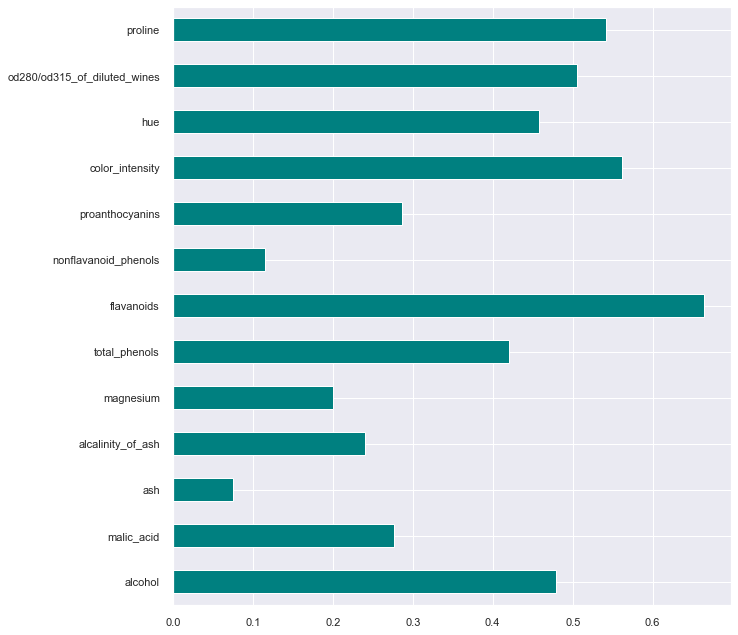

In [ ]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
data = load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
X = df
y = data.target

importances = mutual_info_classif(X,y)
plt.subplots(figsize=(10, 11))
feat_importances = pd.Series(importances, df.columns)
feat_importances.plot(kind='barh', color='teal');

##### Chi-square Test

The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently and values should have an expected frequency greater than 5.

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

X_cat = X.values.astype(int)
chi2_features = SelectKBest(chi2,k=3)
X_kbest_features = chi2_features.fit_transform(X_cat,y)

print("Original feature number:",X_cat.shape[1])
print("Reduced feature number:",X_kbest_features.shape[1])

Original feature number: 13
Reduced feature number: 3


##### Fisher’s Score

Fisher score is one of the most widely used supervised feature selection methods. The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

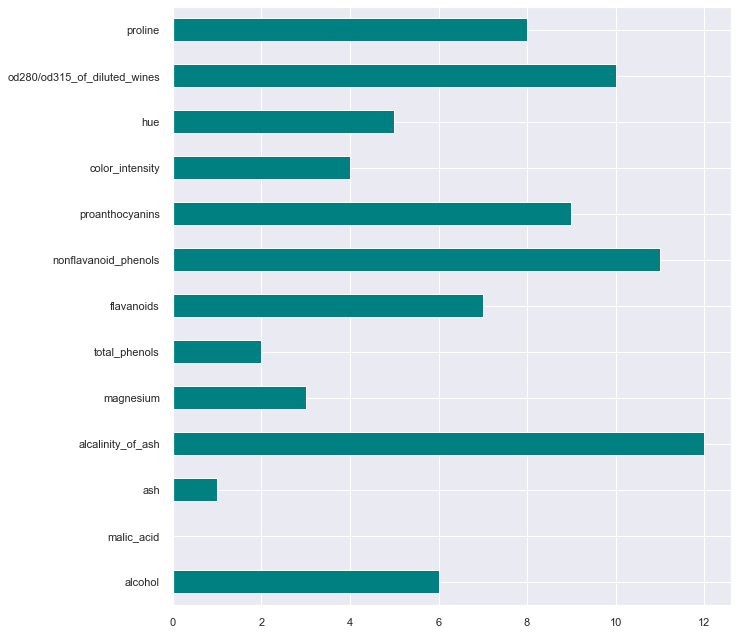

In [ ]:
from skfeature.function.similarity_based import fisher_score
ranks = fisher_score.fisher_score(X.values,y)
plt.subplots(figsize=(10, 11))
feat_importances = pd.Series(ranks,df.columns)
feat_importances.plot(kind="barh", color = "teal");

##### Correlation Coefficient

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.

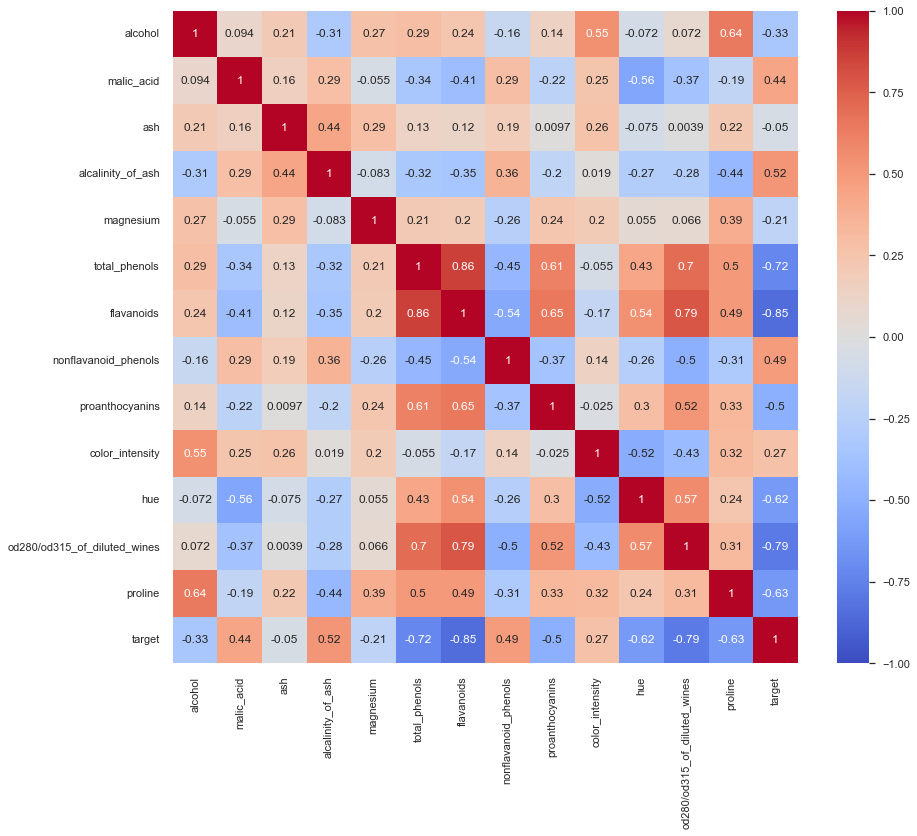

In [ ]:
import seaborn as sns

data_frame = df.copy()
data_frame.insert(13,'target',y)
cor = data_frame.corr()
plt.figure(figsize=(14,12))
sns.heatmap(cor,annot=True,vmin=-1,vmax=1,cmap='coolwarm');

We need to set an absolute value, say 0.5 as the threshold for selecting the variables. If we find that the predictor variables are correlated among themselves, we can drop the variable which has a lower correlation coefficient value with the target variable. We can also compute multiple correlation coefficients to check whether more than two variables are correlated to each other. This phenomenon is known as multicollinearity.

##### Variance Threshold

The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X)
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

The get_support returns a Boolean vector where True means that the variable does not have zero variance.

##### Mean Absolute Difference (MAD)
The mean absolute difference (MAD) computes the absolute difference from the mean value. The main difference between the variance and MAD measures is the absence of the square in the latter. The MAD, like the variance, is also a scale variant. This means that higher the MAD, higher the discriminatory power.



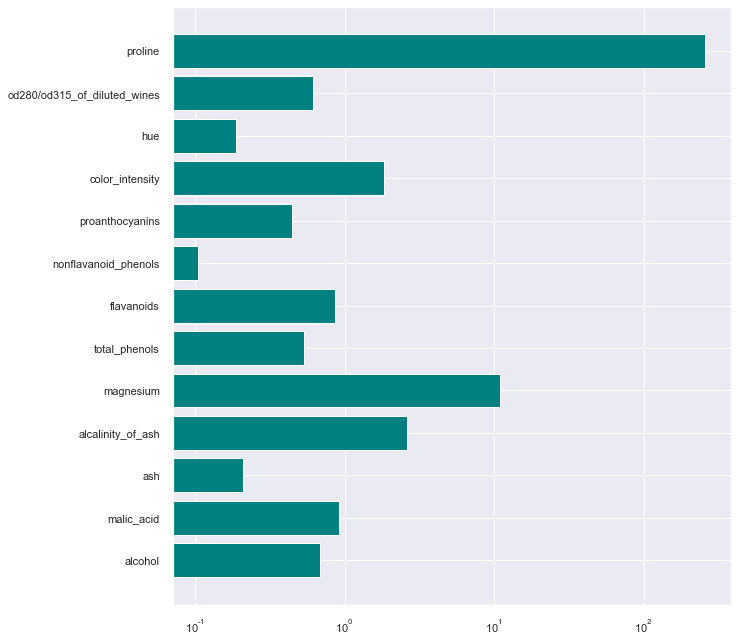

In [ ]:
mean_abs_diff = np.sum(np.abs(X.values-np.mean(X.values,axis=0)),axis=0)/X.shape[0]
plt.subplots(figsize=(10, 11))
plt.barh(np.arange(X.shape[1]),mean_abs_diff,color='teal')
plt.yticks(np.arange(13),labels=df.columns);
plt.xscale('log')

##### Dispersion ratio
Another measure of dispersion applies the arithmetic mean (AM) and the geometric mean (GM). For a given (positive) feature $X_i$ on n patterns, the AM and GM are given by

$$AM_i = \bar{X_i}=\frac{1}{n}\sum_{j=1}^{n}{X_{ij}},\qquad GM_i=\left(\prod_{j=1}^{n}{X_{ij}}\right)^{\frac{1}{n}}$$

respectively; since $AM_i \leq GM_i$, with equality holding if and only if $X_{i1} = X_{i2} =... = X_{in}$, then the ratio

$$RM_i=\frac{AM_i}{GM_i}\in [1,+\infty)$$

can be used as a dispersion measure. Higher dispersion implies a higher value of $R_i$, thus a more relevant feature. Conversely, when all the feature samples have (roughly) the same value, $R_i$ is close to 1, indicating a low relevance feature.

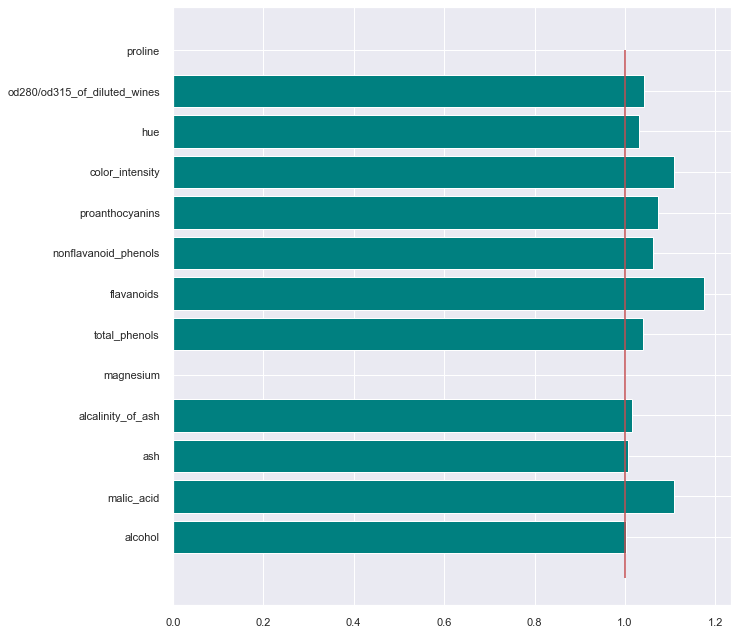

In [ ]:
X_ = X.values + np.finfo(float).eps
am = np.mean(X_,axis=0)
gm = np.power(np.prod(X_,axis=0),1/X_.shape[0])

disp_ratio = am/gm
plt.subplots(figsize=(10, 11))
plt.barh(np.arange(X.shape[1]),disp_ratio,color='teal')
plt.yticks(np.arange(13),labels=df.columns);
plt.vlines(x=1,ymin=-1,ymax=12,color='r')
# plt.xscale('log')

#### Wrapper Methods:
Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods.

Let’s, discuss some of these techniques:

##### Forward Feature Selection
This is an iterative method wherein we start with the best performing variable against the target. Next, we select another variable that gives the best performance in combination with the first selected variable. This process continues until the preset criterion is achieved.

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

data = load_diabetes()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
X = df
y = data.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
lr = LinearRegression()
lr.fit(X_train,y_train)
print(r2_score(y_test,lr.predict(X_test)))
fss = SequentialFeatureSelector(lr,k_features='best',forward=True,n_jobs=-1)
fss.fit(X,y)
features = list(fss.k_feature_names_)
lr.fit(X_train[features],y_train)
y_pred = lr.predict(X_test[features])
r2_score(y_test,y_pred)

0.4973545703159825


0.5062292632896911

##### Backward Feature Elimination

This method works exactly opposite to the Forward Feature Selection method. Here, we start with all the features available and build a model. Next, we the variable from the model which gives the best evaluation measure value. This process is continued until the preset criterion is achieved.

In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score

lr = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=45, n_jobs=-1, max_iter=500)
data = load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
X = df
y = data.target
lr.fit(X,y)
bfs = SequentialFeatureSelector(lr, k_features='best', forward=False, n_jobs=-1)
bfs.fit(X,y)
features = list(bfs.k_feature_names_)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
lr.fit(X_train[features],y_train)
y_pred = lr.predict(X_test[features])

print("Original feature number:",X.shape[1])
print("Reduced feature number:",len(features))
print("Accuracy: %.2f"%(accuracy_score(y_test,y_pred)*100))

Original feature number: 13
Reduced feature number: 6
Accuracy: 91.67


This method along with the one discussed above is also known as the Sequential Feature Selection method.

##### Recursive Feature Elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.

Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [ ]:
from sklearn.feature_selection import RFE
data = load_diabetes()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
X = df
y = data.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
lr = LinearRegression()
rfe = RFE(lr,n_features_to_select=7)
rfe.fit(X_train,y_train)
y_pred = rfe.predict(X_test)
r2_score(y_test,y_pred)

0.5087168079805987

#### Embedded Methods:

These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features but also maintaining reasonable computational cost. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.

Let’s, discuss some of these techniques click here:

##### LASSO Regularization (L1)

Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e. to avoid over-fitting. In linear model regularization, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularization, Lasso or L1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

##### Random Forest Importance

Random Forests is a kind of a Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words a decrease in the impurity (**Gini impurity**) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

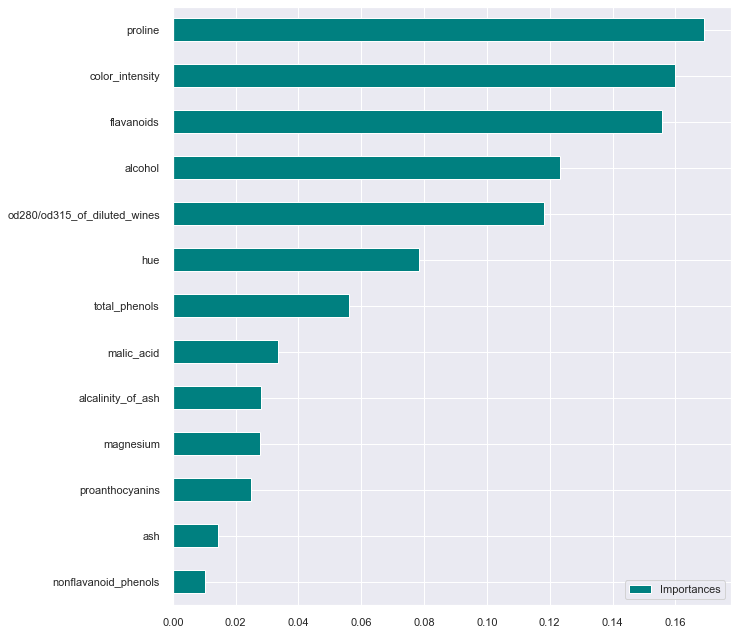

In [ ]:
from sklearn.ensemble import RandomForestClassifier

data = load_wine()
df   = pd.DataFrame(data=data.data, columns=data.feature_names)
X    = df
y    = data.target

model = RandomForestClassifier(n_estimators=340)
model.fit(X,y)
importances = model.feature_importances_
fig,axs = plt.subplots(figsize=(10, 11))
final_df = pd.DataFrame({"Features":pd.DataFrame(X).columns,"Importances":importances})
final_df.set_index("Importances")
final_df = final_df.sort_values("Importances")
final_df.plot.barh(color="teal",ax=axs)
plt.yticks(np.arange(13),labels=final_df['Features']);

<font color="#e30b5d"><h1>Feature Extraction</h1></font>
Feature Extraction contains two sub categories:
- Linear Methods
    - Principal Component Analysis (PCA)
    - Independent Component Analysis (ICA)
    - Autoencoders (linear act. func.)
    - Singular Vector Decomposition (SVD)
    - Linear Disciminant Analysis (LDA)
    - ...
    
- Nonlinear Methods
    - t-Dist. Stochastic Neigh. Emb.(t-SNE)
    - Uniform Manifold Approx. & Proj. (UMAP)
    - Kernel PCA
    - Spectral Clustering
    - Autoencoders (non-linear act. func.)
    - ...

<font color="#9a083f"><h3>Principal Component Analysis (PCA) </h3></font>

In this section, we explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA). PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more. After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.

#### Introducing Principal Component Analysis

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data, which we saw briefly in Introducing Scikit-Learn. Its behavior is easiest to visualize by looking at a two-dimensional dataset. Consider the following 200 points:


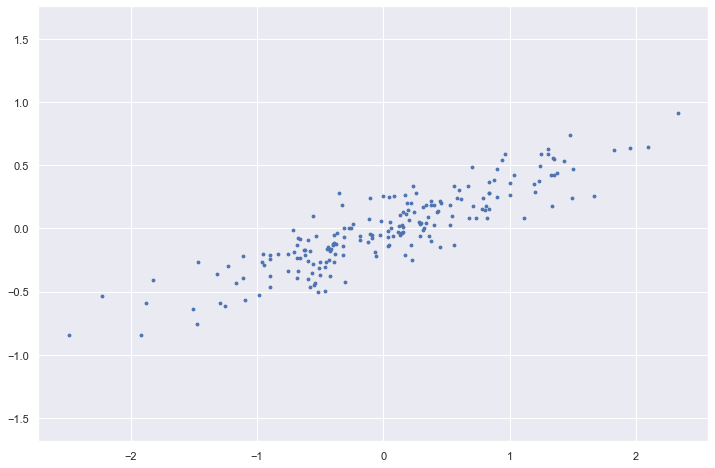

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.subplots(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1],s=8,c='b')
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables. This is reminiscent of the linear regression data we explored in In Depth: Linear Regression, but the problem setting here is slightly different: rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [ ]:
print("PCA {Components}:\n%s\n"%pca.components_)
print("PCA {Variance}:\n%s"%pca.explained_variance_)

PCA {Components}:
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]

PCA {Variance}:
[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

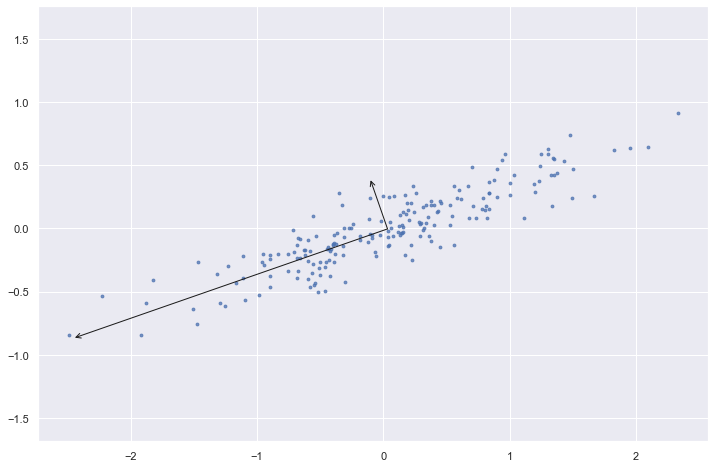

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=1,
                    shrinkA=0, shrinkB=0,color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.subplots(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1],s=8,c='b', alpha=0.75)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here:

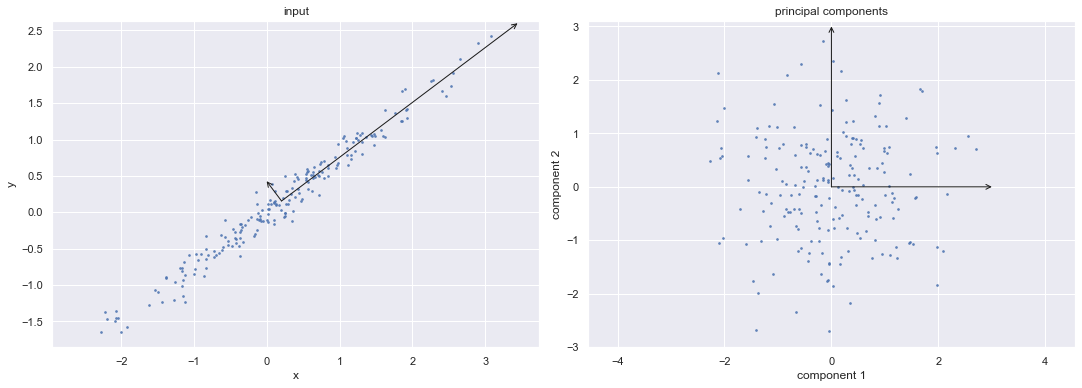

In [ ]:
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1],s=3,c='b', alpha=0.75)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1],s=3,c='b', alpha=0.75)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))
plt.show()

This transformation from data axes to principal axes is an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

#### PCA as dimensionality reduction
Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

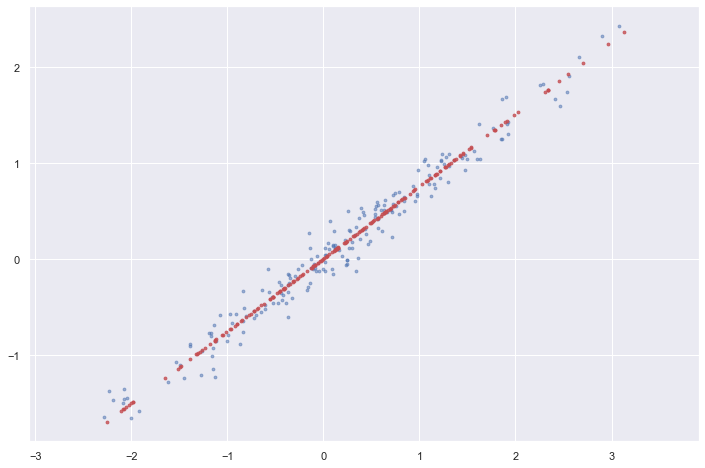

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.subplots(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1],s=8,c='b' ,alpha=0.5)
plt.scatter(X_new[:, 0], X_new[:, 1],s=8,c='r', alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

#### PCA for visualization: Hand-written digits
The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.

We start by loading the data:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two and We can now plot the first two principal components of each point to learn about the data:

(1797, 64)
(1797, 2)


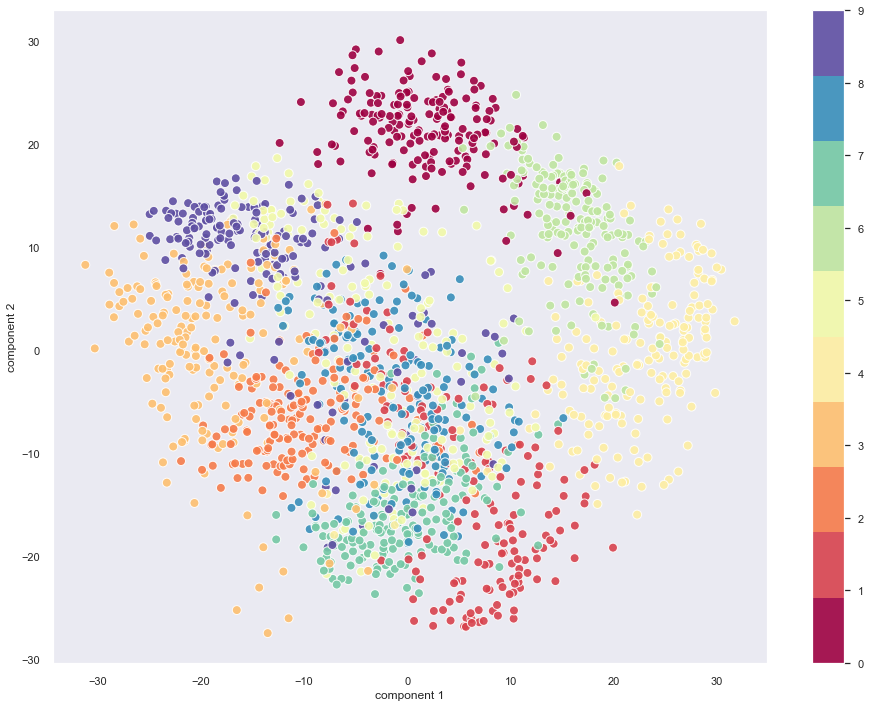

In [ ]:
from matplotlib import style
sns.set()
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
plt.subplots(figsize=(16, 12))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='w',s=80 ,alpha=0.9,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.grid(False)
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

#### Choosing the number of components
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

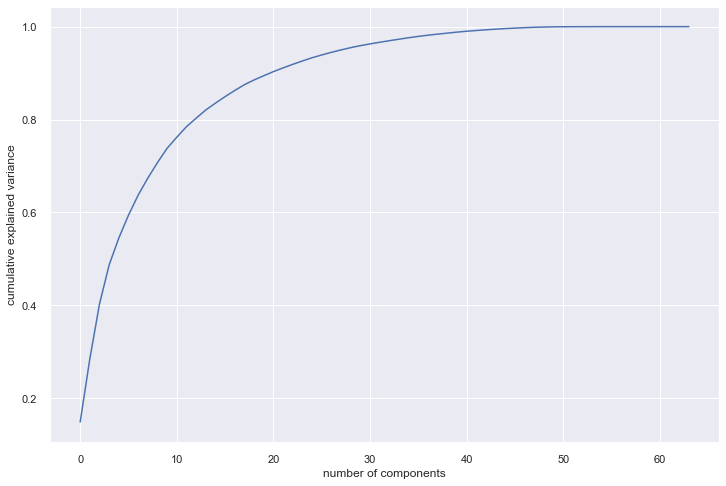

In [ ]:
sns.set()
pca = PCA().fit(digits.data)
plt.subplots(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first  N  components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

#### Example: Eigenfaces
Earlier we explored an example of using a PCA projection as a feature selector for facial recognition with a support vector machine. Here we will take a look back and explore a bit more of what went into that. Recall that we were using the Labeled Faces in the Wild dataset made available through Scikit-Learn:

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's take a look at the principal axes that span this dataset.
Because this is a large dataset, we will use ``RandomizedPCA``—it contains a randomized method to approximate the first $N$ principal components much more quickly than the standard ``PCA`` estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000).
We will take a look at the first 150 components:

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors," so these types of images are often called "eigenfaces"). As you can see in this figure, they are as creepy as they sound:

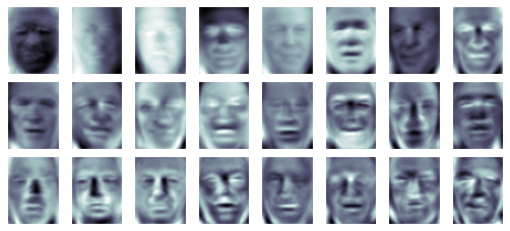

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips. Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

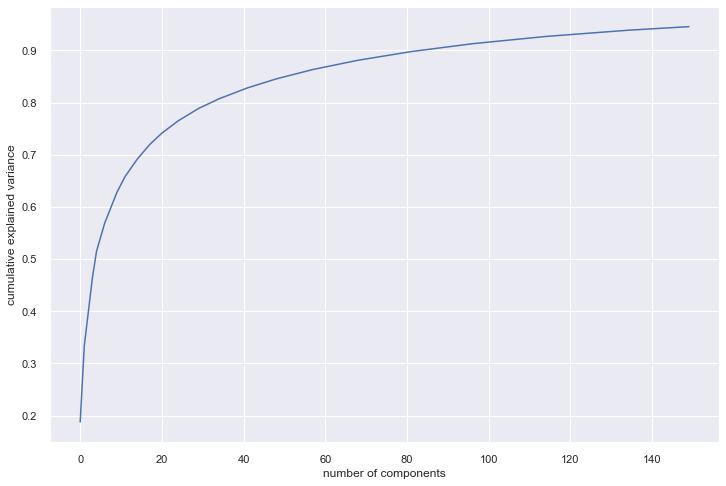

In [ ]:
plt.subplots(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 90 components account for just over 90% of the variance. That would lead us to believe that using these 90 components, we would recover most of the essential characteristics of the data. To make this more concrete, we can compare the input images with the images reconstructed from these 90 components:

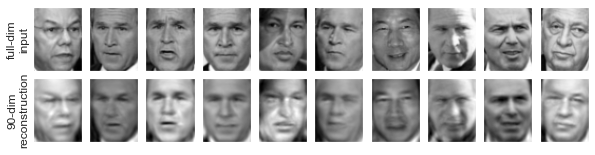

In [ ]:
# Compute the components and projected faces
pca = RandomizedPCA(90).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('90-dim\nreconstruction');

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 90 of the ~3,000 initial features. This visualization makes clear why the PCA feature selection used in Support Vector Machines was so successful: although it reduces the dimensionality of the data by nearly a factor of 33, the projected images contain enough information that we might, by eye, recognize the individuals in the image. What this means is that our classification algorithm needs to be trained on 90-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

<font color="#9a083f"><h3>Linear Disciminant Analysis (LDA)</h3></font>

Linear Discriminant Analysis (LDA) searches for the projection of a dataset which maximizes the *between class scatter to within class scatter* ($\frac{S_B}{S_W}$) ratio of this projected dataset. The goal is to project/transform a dataset $A$ using a transformation matrix $w$ such that the ratio of between class scatter to within class scatter of the transformed dataset $Y=w^T*A$ is maximized. Hence our goal is to find the transformation matrix $w$ that accomplishes this. In Fisher's terms:

![image.png](https://python-course.eu/images/machine-learning/Linear_Discriminant_Analysis_illustration_300w.webp)

**"Find the linear combination $Z=a^T*X$ such that the between class variance is maximized relative to the within class variance."**(Hastie, Tibshirani and Friedman, 2008, p.114). Therewith, LDA is like PCA which we have introduced in the last chapter with the difference, that LDA aims to find the projection of maximum separability. But slowly. Consider the following illustration which shows a dataset consisting of three different classes. We now want to have the within and between class scatter of this dataset.

![image.png](https://python-course.eu/images/machine-learning/Linear_Discriminant_Analysis_concept_illustration_600w.webp)

#### Maths behind LDA

As we can see in the illustration, we want to have a measure of the within and between class scatters. Therefore, we use the following two formulas for the between class scatter $S_B$ and the within class scatter $(S_W)$. Let's derive the meaning of them

 $$
 \begin{gather*}
 Scatter\;Within\,(S_W)\\
 S_W=\sum_{classes c}\sum_{j\in c}(x_j-\mu_c)(x_j-\mu_c)^T
 \end{gather*}
 $$


Here $classes\;c$ are the (in our case) three different classes (rectangle, triangles and circles). $x_j$ is the value vector per instance per class (we have in our case two dimensions x and y, so for instance $x_1$ has the dimensionality 2x1). $\mu_c$ represents the mean-vector of class $c$ and is a vector which contains the values of each dimension for each class. Hence, if for instance, class 1 is of shape 2x15 (15 values and two dimensions), the mean vector for class 1 is of shape 2x1 and hence we can subtract $\mu_c$ from $x_j$. We want to have this term as small as possible since the closer the datapoints per class are together, the easier it is to separate this class from the other classes.

So figuratively speaking, we calculate the scatter matrix per class $c$ to get the scatter within each class (within the triangles, the rectangles and the circles --> Therefore we calculate $(x_j-\mu_c)(x_j-\mu_c)^T$ for each $j$ that is for each instance, which gives us for each instance $x_j$ a $mxm$ matrix assuming that each $x_j$ is of dimensionality $mx1$ where $m$ is the number of features in the dataset. We then sum up all these matrices to get the scatter within each class) and second sum up these scatter matrices to receive a measure of the scatter within the total dataset $S_W$.

Mind that we calculated the scatter matrices and not the covariance matrices since then we must divide by n respectively n-1 but we didn't do that here. Nevertheless, the dimensionality of the scatter matrix is the same as for the covariance matrix. When a class has 2 dimensions, the scatter matrix is of shape (2x2) and consists of the elements:
$$
 \begin{bmatrix}
 scatter_{xx} & scatter_{xy}\\
 scatter_{yx} & scatter_{yy}
 \end{bmatrix}
$$
As said, we calculate the scatter per class and then sum up all the per_class scatter matrices to receive a measure for the scatter within ($S_W$)

Let's derive this with Python code:

[[ 1.07646534 -0.05208045]
 [-0.05208045  0.45007299]]


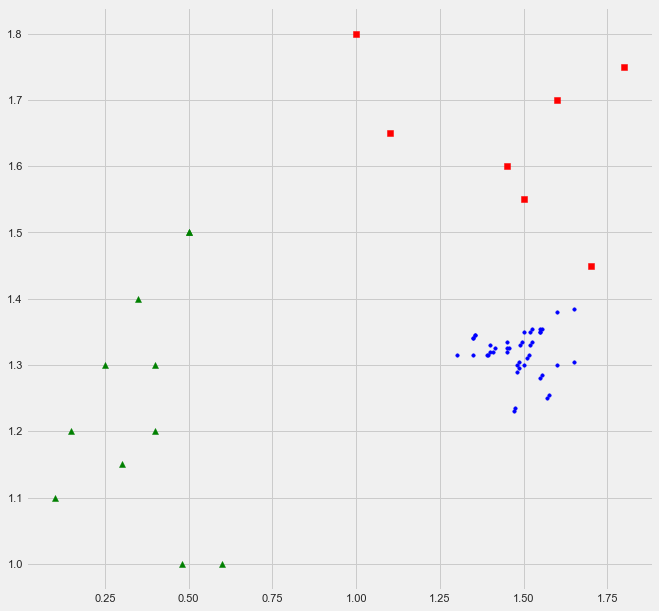

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
np.random.seed(seed=42)

# Create data
rectangles = np.array([[1,1.5,1.7,1.45,1.1,1.6,1.8],[1.8,1.55,1.45,1.6,1.65,1.7,1.75]])
triangles = np.array([[0.1,0.5,0.25,0.4,0.3,0.6,0.35,0.15,0.4,0.5,0.48],[1.1,1.5,1.3,1.2,1.15,1.0,1.4,1.2,1.3,1.5,1.0]])
circles = np.array([[1.5,1.55,1.52,1.4,1.3,1.6,1.35,1.45,1.4,1.5,1.48,1.51,1.52,1.49,1.41,1.39,1.6,1.35,1.55,1.47,1.57,1.48,
                    1.55,1.555,1.525,1.45,1.35,1.65,1.355,1.455,1.45,1.55,1.485,1.515,1.525,1.495,1.415,1.395,1.65,1.355,1.555,1.475,1.575,1.485]
                    ,[1.3,1.35,1.33,1.32,1.315,1.30,1.34,1.32,1.33,1.35,1.30,1.31,1.35,1.33,1.32,1.315,1.38,1.34,1.28,1.23,1.25,1.29,
                     1.35,1.355,1.335,1.325,1.3155,1.305,1.345,1.325,1.335,1.355,1.305,1.315,1.355,1.335,1.325,1.3155,1.385,1.345,1.285,1.235,1.255,1.295]])

#Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

ax0.scatter(rectangles[0],rectangles[1],marker='s',c='red',edgecolor='red')
ax0.scatter(triangles[0],triangles[1],marker='^',c='green',edgecolor='green')
ax0.scatter(circles[0],circles[1],s=12,marker='o',c='blue',edgecolor='blue')


# Calculate the mean vectors per class
mean_rectangles = np.mean(rectangles,axis=1).reshape(2,1) # Creates a 2x1 vector consisting of the means of the dimensions 
mean_triangles = np.mean(triangles,axis=1).reshape(2,1)
mean_circles = np.mean(circles,axis=1).reshape(2,1)

# Calculate the scatter matrices for the SW (Scatter within) and sum the elements up

scatter_rectangles = np.dot((rectangles-mean_rectangles),(rectangles-mean_rectangles).T)


# Mind that we do not calculate the covariance matrix here because then we have to divide by n or n-1 as shown below
#print((1/7)*np.dot((rectangles-mean_rectangles),(rectangles-mean_rectangles).T))
#print(np.var(rectangles[0],ddof=0))

scatter_triangles = np.dot((triangles-mean_triangles),(triangles-mean_triangles).T)
scatter_circles = np.dot((circles-mean_circles),(circles-mean_circles).T)

# Calculate the SW by adding the scatters within classes 
SW = scatter_triangles+scatter_circles+scatter_rectangles
print(SW)
plt.show()

$$
\begin{gather*}
Scatter \; Between\,(S_B)\\
S_B=\sum_{classes\;c}N_c(\mu_c-\mu)(\mu_c-\mu)^T
\end{gather*}
$$

With this second formula figuratively speaking, we measure the scatter of the total dataset, that is the scatter between the classes and therewith how "far away" the single class-clusters are. Here $classes\; c$ are the different classes of our dataset (rectangles, triangles, circles). $\mu_c$ is the mean per class which has dimensionality $2\times 1$ since for each dimension per class it consists one value. $\mu$ is the mean of the total dataset and has dimensionality $2 \times 1$ as well, since it also contains one value per dimension with the difference that we now consider all datapoints in the dataset and not only the datapoints belonging to one class $c$. The derivation of the $S_B$ is not that obvious but can be derived with: Assume we create a total scatter matrix with $S_T = \sum_x (x-\mu)(x-\mu)^T$ 
 where $\mu$ is the mean of the total dataset. We know that $(x-\mu)=(\mu_c-\mu)+(x-\mu_c)$ . For illustration purposes look at the following plot where we see that in a geometrical sense the equation holds true. Here the red line illustrates the left side of the equation while the yellow bold line represents the right side of the equation. The two lines align.

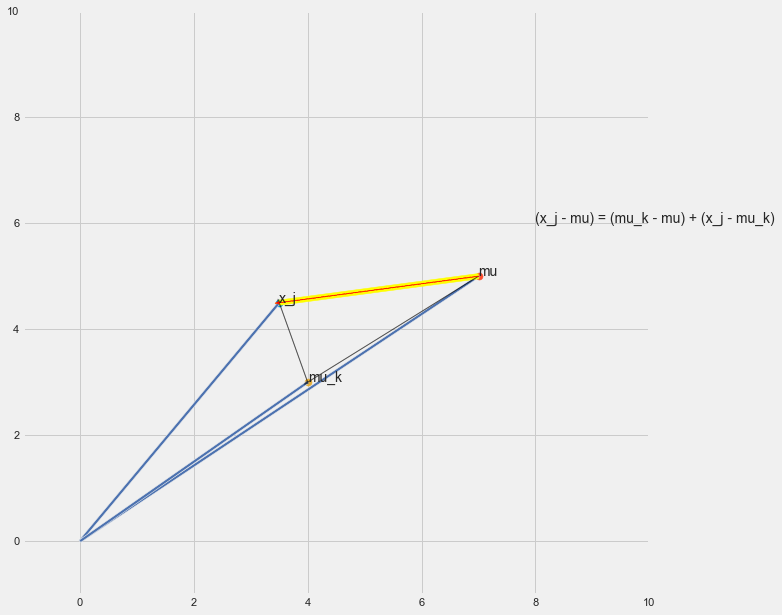

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
np.random.seed(seed=42)



x_j = np.array([3.5,4.5])
mu = np.array([7,5])
mu_k = np.array([4,3])


fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-1,10)
ax0.set_ylim(-1,10)


for i in [x_j,mu,mu_k]:
    ax0.scatter(i[0],i[1],s=50)

ax0.annotate('x_j',x_j)
ax0.annotate('mu',mu)
ax0.annotate('mu_k',mu_k)
ax0.annotate('(x_j - mu) = (mu_k - mu) + (x_j - mu_k)',np.array(mu)+np.array([1,1]))

# Draw the position vectors 
for i in [x_j,mu,mu_k]:
    ax0.arrow(0,0,i[0],i[1],head_width=0.01,width=0.05)
    
# Draw the vectors
ax0.arrow(mu[0],mu[1],(x_j-mu)[0],(x_j-mu)[1],head_width=0.05,width=0.1,color='yellow') # xj_minus_mu
ax0.arrow(mu[0],mu[1],(mu_k-mu)[0],(mu_k-mu)[1],head_width=0.05,width=0.01,alpha=0.5,color='black') # mu_k_minus_mu
ax0.arrow(mu_k[0],mu_k[1],(x_j-mu_k)[0],(x_j-mu_k)[1],head_width=0.05,width=0.01,alpha=0.5,color='black') # xj_minus_mu_k

# If we now add up the vectors (mu_k-mu) and (x_j-mu_k) wee see that this vector alligns with the vector (x_k-mu)
mu_k_minus_mu = mu_k-mu
x_j_minus_mu_k = x_j-mu_k
res = (mu_k-mu)+(x_j-mu_k)
ax0.arrow(mu[0],mu[1],res[0],res[1],head_width=0.05,width=0.01,linestyle='-.',color='red')

plt.show()

If we insert this in our $S_T$ equation we get:
$$
\begin{aligned}
&S_{T}=\sum_{\text {classes } c} \sum_{x \in D_{c}}\left(\boldsymbol{x}-\boldsymbol{\mu}_{\boldsymbol{c}}+\boldsymbol{\mu}_{\boldsymbol{c}}-\boldsymbol{\mu}\right)\left(\boldsymbol{x}-\boldsymbol{\mu}_{\boldsymbol{c}}+\boldsymbol{\mu}_{\boldsymbol{c}}-\boldsymbol{\mu}\right)^{T}\\
&=\underbrace{\sum_{\text {classes } c} \sum_{x \in D_{c}}\left(\boldsymbol{x}-\boldsymbol{\mu}_{\boldsymbol{c}}\right)\left(\boldsymbol{x}-\boldsymbol{\mu}_{\boldsymbol{c}}\right)^{T}}_{S_{W}}+\sum_{\text {classes } c} \sum_{x \in D_{c}}\left(\boldsymbol{\mu}_{\boldsymbol{c}}-\boldsymbol{\mu}\right)\left(\boldsymbol{\mu}_{\boldsymbol{c}}-\boldsymbol{\mu}\right)^{T}\\
&=S_{W}+\underbrace{\sum_{\text {classes } c} n_{c}\left(\boldsymbol{\mu}_{c}-\boldsymbol{\mu}\right)\left(\boldsymbol{\mu}_{c}-\boldsymbol{\mu}\right)^{T}}_{S_{B}}
\end{aligned}
$$

Where $\sum_{x\in D_c}$ was replaced by $n_c$ since $x$ is a vector consisting of the values of one line of the dataset. Hence with  
 $\sum_{x\in D_c}$ we sum up $(\mu_c-\mu)(\mu_c-\mu)^T$ as many times ($n_c$) as there are rows in  and hence we can simply say $n_c (\mu_c-\mu)(\mu_c-\mu)^T$.

Now it is sufficient to say that the total scatter ($S_T$) is the sum of $S_W$ and $S_B$ and hence we can define the second term of the equation above as $S_B$.

Ok, now we know how we get $S_B$ and $S_W$ and we know that we want to maximize $\frac{S_B}{S_W}$ to get a as good as possible separation. Further we know that we want to achieve that by transforming our data to a lower dimensionality. But what we do not know until know is **how to do that**.

Yet, we know that we can transform data using a transformation matrix $w$. How the transformation works was described in the last chapter about Principal Component Analysis and can be looked up there. So, if we denote the transformed dataset as $Y$ , we find $Y$ with $Y=w^T * X$ . From linear algebra we know, that we can say that the transformation using  is applied to each point in the dataset. That is, also to $\mu$ and $\mu_k$ . This is illustrated in the following figure where I have plotted an arbitrarily dataset (blue scatters) together with an arbitrarily $\mu_c$ and an arbitrarily $\mu$ .

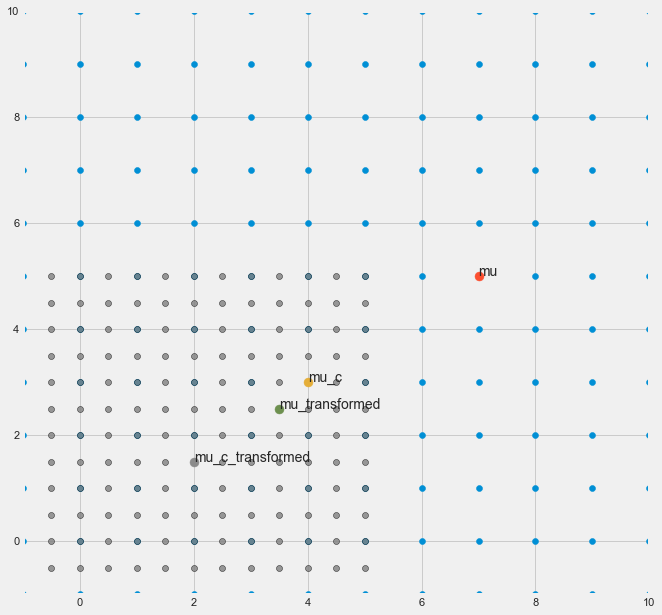

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
np.random.seed(seed=42)



mu = np.array([7,5]).reshape(2,1)
mu_c = np.array([4,3]).reshape(2,1)


fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-1,10)
ax0.set_ylim(-1,10)

# Plot the meshgrid
X,Y = np.meshgrid(np.linspace(-1,10,num=12),np.linspace(-1,10,num=12))
data = np.array([X.reshape(1,144),Y.reshape(1,144)]).reshape(2,144)


ax0.scatter(X,Y)


# Transform the data using w
w = np.array([[0.5,0],[0,0.5]])


data_trans = np.dot(data.T,w)
mu_trans = np.dot(mu.reshape(2,1).T,w).reshape(2,1)
mu_c_trans = np.dot(mu_c.reshape(2,1).T,w).reshape(2,1)
ax0.scatter(data_trans[:,0],data_trans[:,1],alpha=0.8,color='grey',edgecolor='black')


# Plot mu, mu_trans, mu_k, and mu_k_trans
# Plot mu and mu_k

for i in [mu,mu_c,mu_trans,mu_c_trans]:
    ax0.scatter(i[0],i[1],s=80)

ax0.annotate('mu',[mu[0],mu[1]])
ax0.annotate('mu_c',mu_k)
ax0.annotate('mu_c_transformed',mu_c_trans)
ax0.annotate('mu_transformed',mu_trans)


plt.show()

As you can see, the above transformation using $w$ squished the space by a factor of 0.5.

So applying this this transformation to our $x_j$ , $\mu_c$ and $\mu$ in our $S_W$ and $S_B$ equations gives (mind that $A^{T^T}=A$):

$$ 
 S_W = \sum_{classes\;c}\sum_{j\in c}(w^T(x_j-\mu_c))(w^T(x_j-\mu_c))^T=w^TS_w w
$$
and
$$
 S_B=\sum_{classes\;c}N_c(w^T(\mu_c-\mu))(w^T(\mu_c-\mu))^T=w^TS_Bw
$$
Hence the equation $\frac{S_B}{S_W}$ becomes
$$
\frac{w^TS_Bw}{w^TS_Ww}
$$
So what remains is how we can find $w$ the  that maximizes this equation. It turns out that $w$ can be found by calculating the Eigenvectors of $S_W^{-1}S_B$ and how we can get here is for instance described in Marsland, S. (2015) p.132 as well as [here](http://www.svcl.ucsd.edu/courses/ece271B-F09/handouts/Dimensionality2.pdf) (Warning: PDF).

Nonetheless, when I got first in contact with this formula, it was kind of an obstacle and I wanted to know how I can get there. Hence here is the derivation where the solution is taken from [here](https://stats.stackexchange.com/questions/355054/derivation-of-s-w-1-s-b-during-the-calculation-of-lda/355134#355134):

Finding the maximum of
$$
\frac{w^TS_Bw}{w^TS_Ww}
$$
is the same as maximizing the nominator while keeping the denominator constant and therewith can be denoted as kind of a constrained optimization problem with:

$\max _{w} \boldsymbol{w}^{T} S_{B} \boldsymbol{w}$ with the constraint $w^TS_Ww=K$

Bringing this constrained optimization problem into Lagrangian form gives:
$$
L=w^TS_Bw-\mu(w^TS_Ww-K)
$$

Finding the maximum of a function can be accomplished by calculating and setting the derivative equal to zero.
$$
 \frac{\delta L}{\delta w} = S_Bw-\mu S_Ww=0
$$
or
$$
S_Bw=\lambda S_Ww
$$
This is called a generalized Eigenvalue problem and can (providing that $S_W^{-1}$ exists) be written as:
$$
\begin{gather*}
S_W^{-1}S_Bw=\lambda w \Rightarrow
S_W^{-1}S_Bw\lambda w = 0
\end{gather*}
$$

Since $\lambda$ is a scalar but we want to have only matrices in our equation (to make the maths more easy $\rightarrow$ We want to factorize $w$ in the next line and $\underline{not}$ multiplying $\lambda$ with $I$ would then lead to the situation that we must subtract a scalar from a matrix which is not possible) we want to multiply this with the identity matrix $I$ to get a matrix with the value of on $\lambda$ the diagonal.
$$
S_W^{-1}S_Bw-\lambda Iw=0\Rightarrow (S_W^{-1}S_B-\lambda I)w=0
$$
Solving this equation gives us the Eigenvalues ($\lambda$) and Eigenvectors ($w$) and can be accomplished using ``numpy.linalg.eig(a)`` setting $S_W^{-1}S_B$ for **a** or manually by calculating $det(S_W^{-1}S_B-\lambda I)=0$
, solving for $\lambda$ which gives us the Eigenvalues, and inserting these Eigenvalues ($\lambda$) into $(S_W^{-1}S_B-\lambda I)w=0$ 
 gives us a linear set of equations. Solving these equations for $w$ gives us the corresponding Eigenvectors. But since numpy offers us a neat way to do that with just one line of code, for convenience purposes, I recommend to use numpy over the manual solution :).

Once we have found the $w$ we can use this to transform our original dataset. The whole LDA process is summarized/divided by Raschka, S. (2015) p.139-140 in six steps:

1. Standardize the dataset (zero mean, standard deviation of 1)
2. Compute the total mean vector  as well as the mean vectors per class $\mu_c$
3. Compute the scatter withing and scatter between matrices $S_B$ and $S_W$
4. Compute the eigenvalues and eigenvectors of $S_W^{-1}S_B$ to find the  which maximizes $\frac{w^TS_bw}{w^TS_Ww}$
5. Select the Eigenvectors of the corresponding k largest Eigenvalues to create a $d\times k$ dimensional transformation matrix $w$ where the Eigenvectors are the columns of this matrix
6. Use $w$ to transform the original $n\times d$ dimensional dataset $x$ into a lower, $n\times k$ dimensional dataset $y$

So I think once we have now understand the concept behind LDA its time to make an example in Python following the proposed six steps. Therefore, we use the [UCI wine dataset](https://archive.ics.uci.edu/ml/datasets/wine) which has 13 dimensions. We want to find the transformation which makes the three different classes best linearly separable and plot this transformation in 2 dimensional space.

#### LDA with Python from scratch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
import requests
import io
from io import StringIO
import warnings
warnings.filterwarnings("ignore")

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
s = requests.get(url).content.decode("utf-8")

# 0. Load in the data and split the descriptive and the target feature
df = pd.read_csv(io.StringIO(s),sep=',',names=['target','Alcohol','Malic_acid','Ash','Akcakinity','Magnesium','Total_pheonols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280','Proline'])

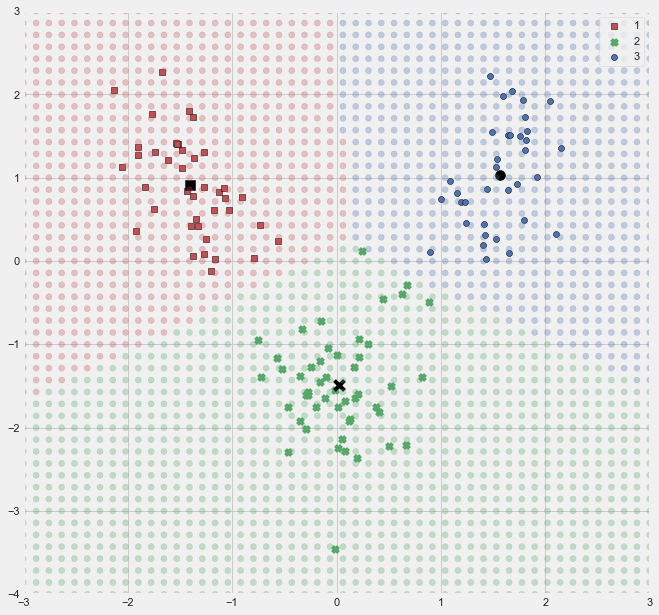

Wall time: 390 ms


In [ ]:
%%time
X = df.iloc[:,1:].copy()
target = df['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0) 


# 1. Standardize the data
for col in X_train.columns:
    X_train[col] = StandardScaler().fit_transform(X_train[col].values.reshape(-1,1))



# 2. Compute the mean vector mu and the mean vector per class mu_k
mu = np.mean(X_train,axis=0).values.reshape(13,1) # Mean vector mu --> Since the data has been standardized, the data means are zero 


mu_k = []

for i,orchid in enumerate(np.unique(df['target'])):
    mu_k.append(np.mean(X_train.where(df['target']==orchid),axis=0))
mu_k = np.array(mu_k).T


# 3. Compute the Scatter within and Scatter between matrices
data_SW = []
Nc = []
for i,orchid in enumerate(np.unique(df['target'])):
    a = np.array(X_train.where(df['target']==orchid).dropna().values-mu_k[:,i].reshape(1,13))
    data_SW.append(np.dot(a.T,a))
    Nc.append(np.sum(df['target']==orchid))
SW = np.sum(data_SW,axis=0)

SB = np.dot(Nc*np.array(mu_k-mu),np.array(mu_k-mu).T)
   
# 4. Compute the Eigenvalues and Eigenvectors of SW^-1 SB
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))


    
# 5. Select the two largest eigenvalues 
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real)) # Select two largest


# 6. Transform the data with Y=X*w
Y = X_train.dot(w)

# Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-3,3)
ax0.set_ylim(-4,3)

for l,c,m in zip(np.unique(y_train),['r','g','b'],['s','x','o']):
    ax0.scatter(Y[0][y_train==l],
                Y[1][y_train==l],
               c=c, marker=m, label=l,edgecolors='black')
ax0.legend(loc='upper right')


# Plot the voroni spaces
means = []

for m,target in zip(['s','x','o'],np.unique(y_train)):
    means.append(np.mean(Y[y_train==target],axis=0))
    ax0.scatter(np.mean(Y[y_train==target],axis=0)[0],np.mean(Y[y_train==target],axis=0)[1],marker=m,c='black',s=100)
   
mesh_x, mesh_y = np.meshgrid(np.linspace(-3,3),np.linspace(-4,3)) 
mesh = []


for i in range(len(mesh_x)):
    for j in range(len(mesh_x[0])):
        date = [mesh_x[i][j],mesh_y[i][j]]
        mesh.append((mesh_x[i][j],mesh_y[i][j]))


NN = KNeighborsClassifier(n_neighbors=1)
NN.fit(means,['r','g','b'])        
predictions = NN.predict(np.array(mesh))

ax0.scatter(np.array(mesh)[:,0],np.array(mesh)[:,1],color=predictions,alpha=0.3)


plt.show()

#### LDA with sklearn
In the following section we will use the prepackaged ``sklearn linear discriminant analysis`` method. The data preparation is the same as above. That is, we use the same dataset, split it in 70% training and 30% test data (Actually splitting the dataset is not mandatory in that case since we don't do any prediction - though, it is good practice and it would not negatively affect our results in this case - so we do it 

(124, 2)
Wall time: 48.3 ms


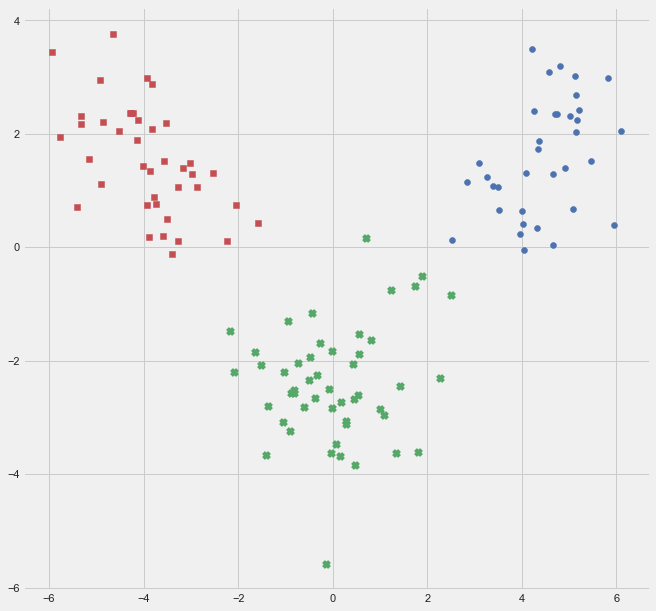

In [ ]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 0. Load in the data and split the descriptive and the target feature
X = df.iloc[:,1:].copy()
target = df['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0) 

# 1. Instantiate the method and fit_transform the algotithm
LDA = LinearDiscriminantAnalysis(n_components=2) # The n_components key word gives us the projection to the n most discriminative directions in the dataset. We set this parameter to two to get a transformation in two dimensional space.  
data_projected = LDA.fit_transform(X_train,y_train)
print(data_projected.shape)
# PLot the transformed data
markers = ['s','x','o']
colors = ['r','g','b']

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
    ax0.scatter(data_projected[:,0][y_train==l],data_projected[:,1][y_train==l],c=c,marker=m)

<font color="#9a083f"><h3>Clustering</h3></font>

**Clustering** or **cluster analysis** is an unsupervised learning problem.

It is often used as a data analysis technique for discovering interesting patterns in data, such as groups of customers based on their behavior.

There are many clustering algorithms to choose from and no single best clustering algorithm for all cases. Instead, it is a good idea to explore a range of clustering algorithms and different configurations for each algorithm.

In this tutorial, you will discover how to fit and use top clustering algorithms in python.

#### Tutorial Overview:

- K-means
- Hierarchical Clustering
- DBSCAN (Density Based Spatial Clustering of Applications with Noise)
- Gaussian Mixture Models
- Clustering Evaluation
    - Clustering Tendency
    - Optimal Number of Clusters
    - Clustering Quality
        - Extrinsic Measures
        - Intrinsic Measures


#### 1. K-means

The K-means algorithm aims to choose centroids that minimise the **inertia**, or **within-cluster sum-of-squares** criterion:

$$
\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)
$$

Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

- Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
- Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

K-means has three steps:

1. The first step chooses the initial centroids, with the most basic method being to choose K samples from the dataset.
2. After initialization, K-means consists of looping between the two other steps. 
    1. The first step assigns each sample to its nearest centroid.
    2. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.


#### Advantages of Hierarchical Clustering:

Easy to understand.
If data sets are distinct then gives the best results.   
Better computational cost.   
Works better with spherical clusters.

#### Disadvantages of Hierarchical Clustering:

Being dependent on initial values.
If there are two highly overlapping data then it cannot be distinguished and cannot tell that there are two clusters
Cannot handle outliers and noisy data.
Sensitive to scale
If very large data sets are encountered then the computer may crash.    


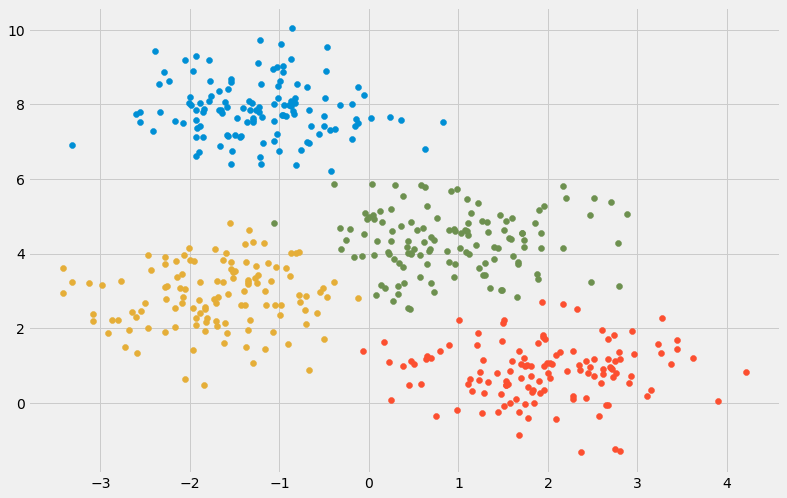

CPU times: total: 93.8 ms
Wall time: 165 ms


In [19]:
%%time
import numpy as np
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib import style
style.use('fivethirtyeight')

sample_size = 500
n_clusters  = 4

X, y = make_blobs(n_samples= sample_size, centers= n_clusters, cluster_std= 0.8, random_state=0)
from sklearn.cluster import KMeans

# define the model
model = KMeans(n_clusters= 4, random_state= 6)

# fit model and predict clusters
y_pred = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(y_pred)
plt.subplots(figsize=(12,8))
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_pred == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show the plot
plt.show()

#### 2. Hierarchical Clustering

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.

The [**AgglomerativeClustering**]("https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering") object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

- **Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- **Maximum** or **complete linkage** minimizes the maximum distance between observations of pairs of clusters.
- **Average linkage** minimizes the average of the distances between all observations of pairs of clusters.
- **Single linkage** minimizes the distance between the closest observations of pairs of clusters.    


#### Advantages of Hierarchical Clustering:

- **Easy to understand.**
- **The dendrogram produced is very useful in understanding the data.**  

#### Disadvantages of Hierarchical Clustering:

- **Arbitrary Decisions:** When using hierarchical clustering it is necessary to specify both the **distance metric** and the **linkage criteria**. There is rarely any strong theoretical basis for such decisions. A core principle of science is that findings are not the result of arbitrary decisions, which makes the technique of dubious relevance in modern research.
- **Missing Data:** Most hierarchical clustering software does not work with values are missing in the data.
- **Data Types:** With many types of data, it is difficult to determine how to compute a distance matrix. There is no straightforward formula that can compute a distance where the variables are both **numeric** and **qualitative** . For example, how can one compute the distance between a 45-year-old man, a 10-year-old-girl, and a 46-year-old woman? Formulas have been developed, but they involve arbitrary decisions.
- **Computational Complexity**
        

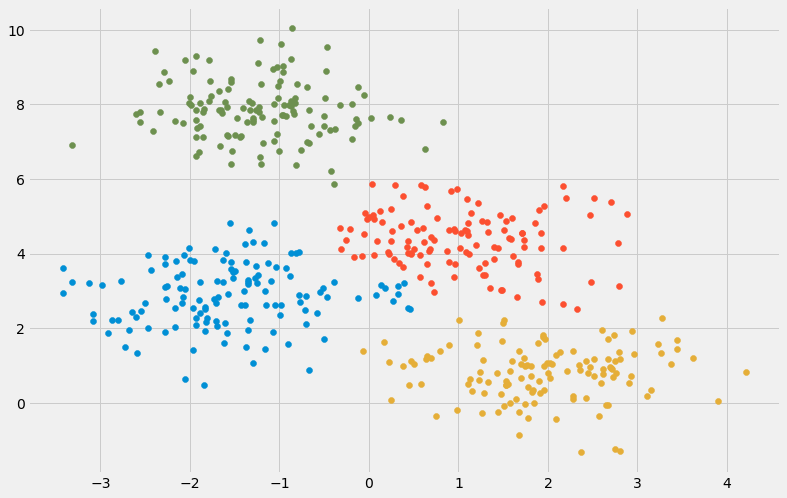

CPU times: total: 109 ms
Wall time: 142 ms


In [20]:
%%time
from sklearn.cluster import AgglomerativeClustering

# define the model
model = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
y_pred = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(y_pred)
plt.subplots(figsize=(12,8))

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_pred == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show the plot
plt.show()

#### **Visualization of cluster hierarchy**

It’s possible to visualize the tree representing the hierarchical merging of clusters as a dendrogram. Visual inspection can often be useful for understanding the structure of the data, though more so in the case of small sample sizes.

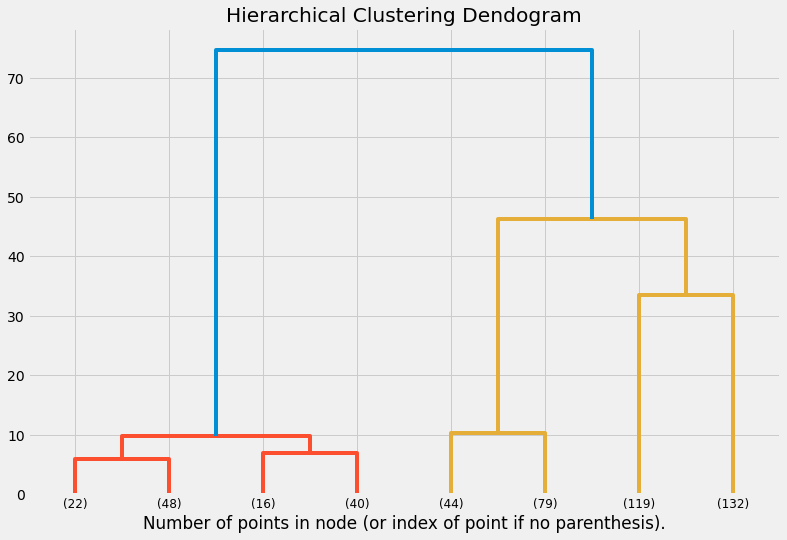

In [21]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)
plt.subplots(figsize=(12,8))

# plot the top p levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=2)

plt.title('Hierarchical Clustering Dendogram')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [6]:
from collections import Counter

Counter(y_pred).values() # counts the elements' frequency

dict_values([126, 122, 125, 127])

### 3. DBSCAN (Density Based Spatial Clustering of Applications with Noise)

The **[DBSCAN]("https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering")** algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples).

There are two parameters to the algorithm, `min_samples` and `eps`, which define formally what we mean when we say dense. Higher `min_samples` or `lower eps` indicate higher density necessary to form a cluster.

More formally, we define a core sample as being a sample in the dataset such that there exist min_samples other samples within a distance of eps, which are defined as neighbors of the core sample. This tells us that the core sample is in a dense area of the vector space. A cluster is a set of core samples that can be built by recursively taking a core sample, finding all of its neighbors that are core samples, finding all of their neighbors that are core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the fringes of a cluster.

Any core sample is part of a cluster, by definition. Any sample that is not a core sample, and is at least eps in distance from any core sample, is considered an outlier by the algorithm.

---
To understand and implement DBSCAN from scratch, we will need to know how DBSCAN is clustering the data. Along with Epsilon and Min Points, there are three more essential terms to understand:

> **Noise** — This is a point that does not have enough neighbors within epsilon to be part of a cluster (including itself).

> **Border Points** — This is a point that has neighbors within epsilon but not enough neighbors to be a core point. These points make up the edge of the cluster.

> **Core Points** — Points that have the Min Points required within epsilon (including itself). These points along with border points will form a cluster.

<center>
<img src="https://www.researchgate.net/publication/342141592/figure/fig4/AS:901775972380681@1592011554293/An-Example-Illustrating-the-Density-Based-DBSCAN-Clustering-Method-Applied-to-SMLM-Data.png"/>
</center>

**How to choose the parameters `min_samples` and `eps`?**

- The parameter **min_samples** primarily controls how tolerant the algorithm is towards noise (on noisy and large data sets it may be desirable to increase this parameter)
- the parameter **eps** is crucial to choose appropriately for the data set and distance function and usually cannot be left at the default value. It controls the local neighborhood of the points. When chosen too small, most data will not be clustered at all (and labeled as -1 for “noise”). When chosen too large, it causes close clusters to be merged into one cluster, and eventually the entire data set to be returned as a single cluster. Some heuristics for choosing this parameter have been discussed in the literature, for example based on a knee in the nearest neighbor distances plot (as discussed in the references below).


### Advantages of DBSCAN:

- **It requires minimal domain knowledge to determine the input parameters.** Other clustering algorithms like **KMeans** requires the user to know how many clusters exist in the data. Instead of requiring how many clusters should be found, DBSCAN requires the user to input **the maximum distance apart each point of data can be** to be considered part of a cluster and **how many data points it takes to form a cluster**.
- **It discovers clusters of any shape.** Since DBSCAN creates clusters based on epsilon and the number of neighbors each point has, it can find clusters of any shape. DBSCAN works best when **the clusters are of the same density (distance between points)**. When clusters of varying density are present, this can make it hard for DBSCAN to identify the clusters.

### Disdvantages of DBSCAN:

- While DBSCAN is great at separating high density clusters from low density clusters, **DBSCAN struggles with clusters of similar density.**
- **Struggles with high dimensionality data.**

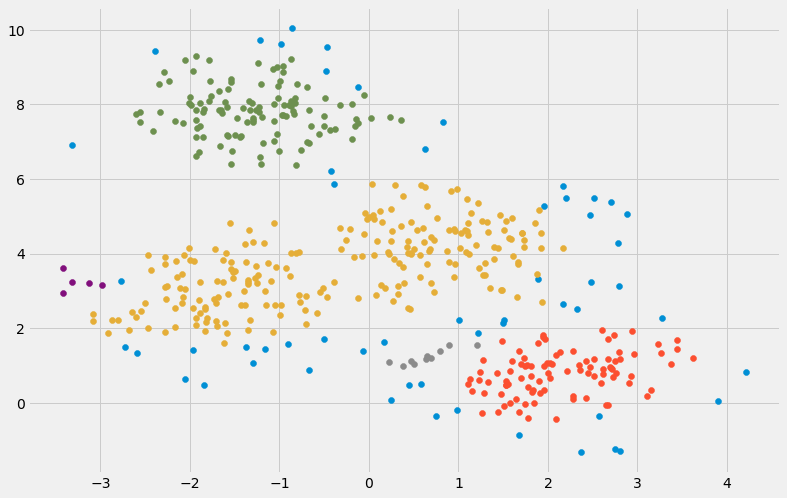

CPU times: total: 141 ms
Wall time: 155 ms


In [22]:
%%time
from sklearn.cluster import DBSCAN

# define the model
model = DBSCAN(eps= 0.4, min_samples= 5)

# fit model and predict clusters
y_pred = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(y_pred)
plt.subplots(figsize=(12,8))
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_pred == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show the plot
plt.show()

### 4. Gaussian Mixture Models
For explanation, refer to **Hands-on 7**

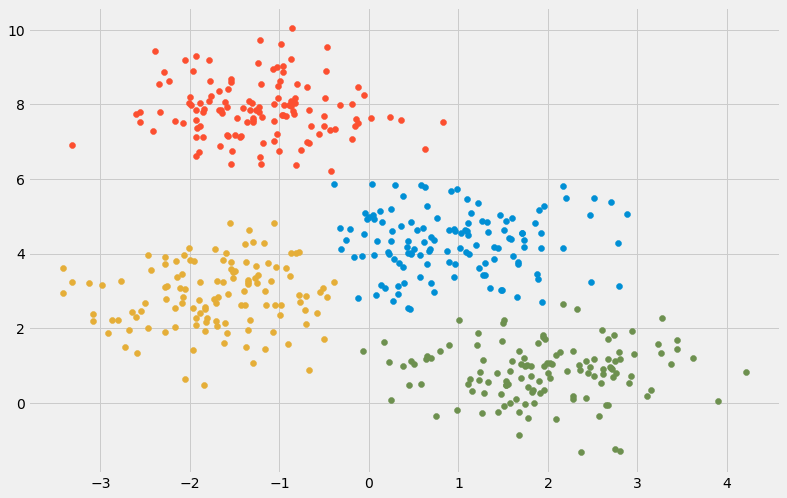

CPU times: total: 93.8 ms
Wall time: 165 ms


In [23]:
%%time
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4)

# fit model and predict clusters
y_pred = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(y_pred)
plt.subplots(figsize=(12,8))
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_pred == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show the plot
plt.show()

#### 5. Clustering Evaluation

**Three important factors by which clustering can be evaluated are:**

- Clustering Tendency
- Optimal Number of Clusters
- Clustering Quality

    - Extrinsic Measures
    - Intrinsic Measures

##### 5.1. Clustering Tendency
Before evaluating the clustering performance, making sure that data set we are working has clustering tendency and **does not contain uniformly distributed points** is very important. If the data does not contain clustering tendency, then clusters identified by any state of the art clustering algorithms may be irrelevant. **Non-uniform distribution of points in data set becomes important in clustering.**

To solve this, Hopkins test, a statistical test for spatial randomness of a variable, can be used to measure the probability of data points generated by uniform data distribution.

- **Null Hypothesis (Ho)** : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
- **Alternate Hypothesis (Ha)**: Data points are generated by random data points (presence of clusters)


If the test is positve (an hopkins score which tends to 0) it means that the data is not uniformly distributed. Hence clustering can be useful to classify the observations. However, if the score is too high (above 0.3 for exemple); the data is uniformly distributed and clustering can’t be really useful for the problem at hand.

In [4]:
from pyclustertend import hopkins

print("The hopkins score of the dataset is: %.3f" %hopkins(X, sample_size))

The hopkins score of the dataset is: 0.197


#### 5.2. Optimal Number of Clusters
Some of the clustering algorithms like **K-means**, require number of clusters, k, as clustering parameter. Getting the optimal number of clusters is very significant in the analysis. If k is too high, each point will broadly start representing a cluster and if k is too low, then data points are incorrectly clustered. Finding the optimal number of clusters leads to granularity in clustering.

There is no definitive answer for finding right number of cluster as it depends upon: 

1. Distribution shape 
2. Scale in the data set
3. Clustering resolution required by user.

Although finding number of clusters is a very subjective problem. There are two major approaches to find optimal number of clusters:

1. Domain knowledge
2. Data driven approach


> **Domain knowledge —**Domain knowledge might give some prior knowledge on finding number of clusters. For example, in case of clustering iris data set, if we have the prior knowledge of species (sertosa, virginica, versicolor) , then k = 3. Domain knowledge driven k value gives more relevant insights.

> **Data driven approach —** If the domain knowledge is not available, mathematical methods help in finding out right number of clusters.

**1. Empirical Method:**

A simple empirical method of finding number of clusters is **Square root of N/2** where **N is total number of data points**, so that each cluster contains square root of 2 * N

The number of optimal clusters using the empirical method is: 15


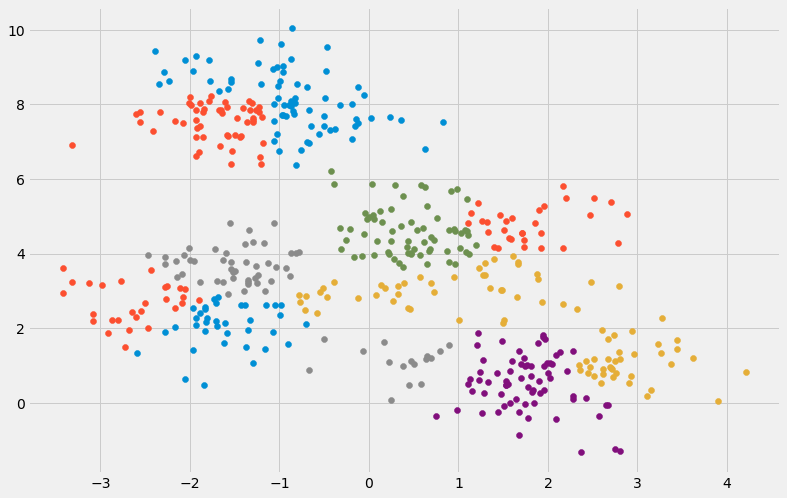

CPU times: total: 156 ms
Wall time: 288 ms


In [24]:
%%time
import math

n_cluster_emp = math.sqrt(sample_size/2)

print("The number of optimal clusters using the empirical method is: %d" %n_cluster_emp)

# define the model
kmeans = KMeans(n_clusters= int(n_cluster_emp), random_state= 6)

# fit model and predict clusters
y_pred_emp = kmeans.fit_predict(X)
plt.subplots(figsize=(12,8))
# retrieve unique clusters
clusters = unique(y_pred_emp)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_pred_emp == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show the plot
plt.show()

**2. Elbow Method:**

Within-cluster variance is a measure of compactness of the cluster. Lower the value of within cluster variance, higher the compactness of cluster formed.

Sum of within-cluster variance, W, is calculated for clustering analyses done with different values of k. W is a cumulative measure how good the points are clustered in the analysis. Plotting the k values and their corresponding sum of within-cluster variance helps in finding the number of clusters.

WCSS or SSE is calculated as the sum of the squared distance between each datapoint and its allocated cluster centroid. If all datapoints are tightly congregated around their allocated centroid, then the SSE will be low — otherwise, it will be high.

C:\Users\PAYTAKHT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


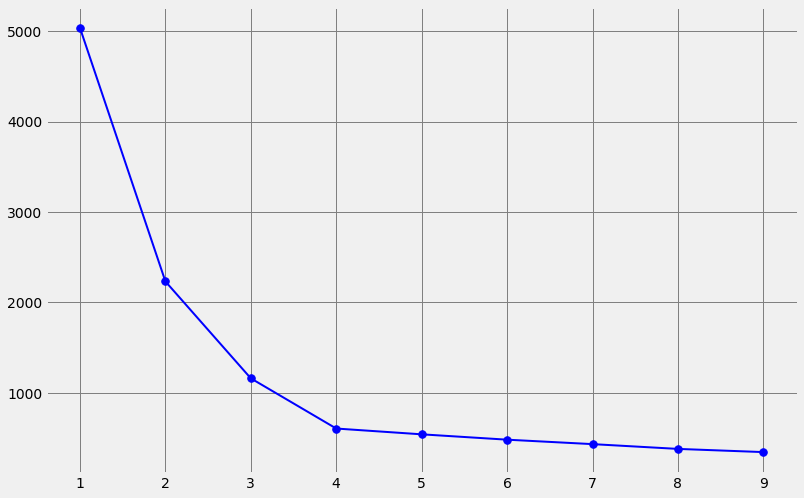

In [9]:
wcss = []
for K in range(1, 10):
    model = KMeans(n_clusters=K)
    model.fit(X)
    wcss.append(model.inertia_)
plt.subplots(figsize=(12,8))   
plt.plot(np.linspace(1,9,9), wcss,'b.-',linewidth=2,markersize=15)
plt.grid(color='gray')
plt.show()

#### 5.3. Clustering Quality

Once clustering is done, **how well the clustering has performed** can be quantified by a **number of metrics**. Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distance.

There are majorly two types of measures to assess the clustering performance.

#### 5.3.1. Extrinsic Measures

Measures which **require ground truth labels**. Examples are Adjusted Rand index, Fowlkes-Mallows scores, Mutual information based scores, Homogeneity, Completeness and V-measure.

**Note:** Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric **should not take the absolute values of the cluster labels into account** but rather if this clustering **define separations of the data similar to some ground truth set of classes** or **satisfying some assumption such that members belong to the same class are more similar than members of different classes according to some similarity metric**.

#### 5.3.1.1. Adjusted Rand Index

**Adjusted Rand index** is a function that measures the **similarity** of the two assignments, ignoring permutations and **with chance normalization**

- Perfect labeling is scored 1.0
- Bad (e.g. independent labelings) have negative or close to 0.0 scores:


In [5]:
from sklearn import metrics

print("Adjusted Rand Index is: %.3f" %metrics.adjusted_rand_score(y, y_pred))

Adjusted Rand Index is: 0.968


##### Advantages

- **Random (uniform) label assignments have a ARI score close to 0.0** for any value of `n_clusters` and `n_samples` (which is not the case for raw Rand index or the V-measure for instance).
- **Bounded range [-1, 1]**: negative values are bad (independent labelings), similar clusterings have a positive ARI, 1.0 is the perfect match score.
- **No assumption is made on the cluster structure**: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with "folded" shapes.

##### Drawbacks 

- Contrary to inertia, **ARI requires knowledge of the ground truth classes** while is almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting). 
However ARI can also be useful in a purely unsupervised setting as a building block for a Consensus Index that can be used for clustering model selection (TODO). 

#### Mutual Information based scores

**The Mutual Information** is a function that measures the **agreement** of the two assignments, ignoring permutations. Two different normalized versions of this measure are available, **Normalized Mutual Information (NMI)** and **Adjusted Mutual Information (AMI)**. NMI is often used in the literature, while AMI was proposed more recently and is **normalized against chance**:
- Perfect labeling is scored 1.0
- Bad (e.g. independent labelings) have non-positive scores:

In [6]:
print("Adjusted Mutual Information score is: %.3f" %metrics.adjusted_mutual_info_score(y, y_pred))

print("Normalized Mutual Information score is: %.3f" %metrics.normalized_mutual_info_score(y, y_pred))

Adjusted Mutual Information score is: 0.953
Normalized Mutual Information score is: 0.954


#### Advantages
- **Random (uniform) label assignments have a AMI score close to 0.0** for any value of `n_clusters` and `n_samples` (which is not the case for raw Mutual Information or the V-measure for instance).

- **Upper bound of 1**: Values close to zero indicate two label assignments that are largely independent, while values close to one indicate significant agreement. Further, an AMI of exactly 1 indicates that the two label assignments are equal (with or without permutation). 

#### Drawbacks 
-  Contrary to inertia, **MI-based measures require the knowledge of the ground truth classes** while almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting). However MI-based measures can also be useful in purely unsupervised setting as a building block for a Consensus Index that can be used for clustering model selection. 
- NMI and MI are not adjusted against chance. 

#### 5.3.1.3. Homogenity, Completeness, and V-measure
Given the knowledge of the ground truth class assignments of the samples, it is possible to define some intuitive metric using conditional entropy analysis.

In particular Rosenberg and Hirschberg (2007) define the following two desirable objectives for any cluster assignment:

- **homogeneity:** each cluster contains only members of a single class.
- **completeness:** all members of a given class are assigned to the same cluster.

We can turn those concept as scores **[homogenity_score]("https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score")** and **[completeness_score]("https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score")**. Both are bounded below by 0.0 and above by 1.0 (higher is better)

In [7]:
print("Homogenity score is: %.3f" %metrics.homogeneity_score(y, y_pred))

print("Completeness score is: %.3f" %metrics.completeness_score(y, y_pred))

Homogenity score is: 0.954
Completeness score is: 0.954


Their harmonic mean called **V-measure** is computed by **[v_measure_score]("https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score")**:


In [8]:
print("V-measure score is: %.3f" %metrics.v_measure_score(y,y_pred))

V-measure score is: 0.954


This function’s formula is as follows:


$$
v = \frac{(1 + \beta) \times \text{homogeneity} \times \text{completeness}}{(\beta \times \text{homogeneity} + \text{completeness})}
$$

#### Advantages
- **Bounded scores**: 0.0 is as bad as it can be, 1.0 is a perfect score.
- Intuitive interpretation: clustering with bad V-measure can be **qualitatively analyzed in terms of homogeneity and completeness** to better feel what 'kind' of mistakes is done by the assignment.
- **No assumption is made on the cluster structure**: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with "folded" shapes. 

#### Drawbacks 
- The previously introduced metrics are **not normalized with regards to random labeling**: this means that depending on the number of samples, clusters and ground truth classes, a completely random labeling will not always yield the same values for homogeneity, completeness and hence v-measure. In particular **random labeling won't yield zero scores especially when the number of clusters is large.** 

This problem can safely be ignored when the number of samples is more than a thousand and the number of clusters is less than 10. **For smaller sample sizes or larger number of clusters it is safer to use an adjusted index such as the Adjusted Rand Index (AR!). **

### 5.3.1.4. Fowlkes-Mallows scores

The Fowlkes-Mallows index **[(sklearn.metrics.fowlkes_mallows_score)]("https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html#sklearn.metrics.fowlkes_mallows_score")** can be used when the ground truth class assignments of the samples is known. The Fowlkes-Mallows score FMI is defined as the geometric mean of the pairwise precision and recall:

$${FMI} = \frac{\text{TP}}{\sqrt{(\text{TP} + \text{FP}) (\text{TP} + \text{FN})}} $$

Where `TP` is the number of **True Positive** (i.e. the number of pair of points that belong to the same clusters in both the true labels and the predicted labels), `FP` is the number of **False Positive** (i.e. the number of pair of points that belong to the same clusters in the true labels and not in the predicted labels) and `FN` is the number of **False Negative** (i.e the number of pair of points that belongs in the same clusters in the predicted labels and not in the true labels).

The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.



In [9]:
print("Fowlkes-Malkows score is: %.3f" %metrics.fowlkes_mallows_score(y, y_pred)) 

Fowlkes-Malkows score is: 0.976


#### Advantages
- **Random (uniform) label assignments have a FMI score close to 0.0** for any value of `n_clusters` and `n_samples` (which is not the case for raw Mutual Information or the V-measure for instance). - **Upper-bounded at 1**: Values close to zero indicate two label assignments that are largely independent, while values close to one indicate significant agreement. Further, values of exactly 0 indicate **purely** independent label assignments and a FMI of exactly 1 indicates that the two label assignments are equal (with or without permutation).
- No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with "folded" shapes.

#### Drawbacks 
- Contrary to inertia, **FMI-based measures require the knowledge of the ground truth classes** while almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting). 


### 5.3.2. Intrinsic Measures

Measures that **does not require ground truth labels**. Some of the clustering performance measures are Silhouette Coefficient, Calinski-Harabasz Index, Davies-Bouldin Index etc.

#### 5.3.2.1. Silhouette Coefficient
If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient **[(sklearn.metrics.silhouette_score)]("https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score")** is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

- **a: **The mean distance between a sample and all other points in the same class.
- **b: **The mean distance between a sample and all other points in the next nearest cluster.


The Silhouette Coefficient s for a single sample is then given as:

$$s = \frac{b - a}{max(a, b)}$$

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

In [10]:
print("Silhouette Score is: %.3f" %metrics.silhouette_score(X, y_pred, metric='euclidean'))   

Silhouette Score is: 0.583


#### Advantages

- The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster. 

#### Drawbacks 

- The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN. 


### 5.3.2.2. Calinski-Harabasz Index

If the ground truth labels are not known, the Calinski-Harabasz index **[(sklearn.metrics.calinski_harabasz_score)]("https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score")** - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared)

In [11]:
print("Calinski-Harabasz Index is: %.3f" %metrics.calinski_harabasz_score(X, y_pred))

Calinski-Harabasz Index is: 1215.497


#### Advantages 
- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
- The score is fast to compute. 

#### Drawbacks 
- The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN. 


### 5.3.2.3. Davies Bouldin Index

If the ground truth labels are not known, the Davies-Bouldin index **[(sklearn.metrics.davies_bouldin_score)]("https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score")** can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [12]:
print("Davies-Bouldin Index is: %.3f" %metrics.davies_bouldin_score(X, y_pred))

Davies-Bouldin Index is: 0.582


#### Advantages
- The computation of Davies-Bouldin is simpler than that of Silhouette scores.
- The index is computed only quantities and features inherent to the dataset. 

#### Drawbacks 
- The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.
- The usage of centroid distance limits the distance metric to Euclidean space. 


### 5.3.2.4. Contingency Matrix

Contingency matrix **[(sklearn.metrics.cluster.contingency_matrix)]("https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cluster.contingency_matrix.html#sklearn.metrics.cluster.contingency_matrix")** reports the intersection cardinality for every true/predicted cluster pair. The contingency matrix provides sufficient statistics for all clustering metrics where the samples are independent and identically distributed and one doesn’t need to account for some instances not being clustered.

In [13]:
print("Contingency Matrix:\n")
print(metrics.cluster.contingency_matrix(y, y_pred))

Contingency Matrix:

[[  0   1   0 124]
 [  0 123   0   2]
 [  0   2 122   1]
 [125   0   0   0]]


#### Advantages
- Allows to examine the spread of each true cluster across predicted clusters and vice versa.
- The contingency table calculated is typically utilized in the calculation of a similarity statistic (like the others listed in this document) between the two clusterings. 
#### Drawbacks 
- Contingency matrix is easy to interpret for a small number of clusters, but becomes very hard to interpret for a large number of clusters.
- It doesn't give a single metric to use as an objective for clustering optimisation. 


In [25]:
from time import time

def clustering_fit_stats(estimator, name, data):
    
    t0 = time()
    y_pred = estimator.fit_predict(data)
    
    print('%-9s\t%.3fs\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f  %.3f'
          % (name, (time() - t0),
             metrics.adjusted_rand_score(y, y_pred),
             metrics.adjusted_mutual_info_score(y, y_pred),
             metrics.normalized_mutual_info_score(y, y_pred),
             metrics.homogeneity_score(y, y_pred),
             metrics.completeness_score(y, y_pred),
             metrics.v_measure_score(y,y_pred),
             metrics.silhouette_score(X, y_pred, metric='euclidean'),
             metrics.calinski_harabasz_score(X, y_pred),
             metrics.davies_bouldin_score(X, y_pred)))
    
def clustering_plot(estimator, data,num,flag=True):

    # fit model and predict clusters
    y_pred = estimator.fit_predict(data)

    # retrieve unique clusters
    clusters = np.unique(y_pred)
    plt.subplots(figsize=(12,8))
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(y_pred == cluster)
        # create scatter of these samples
        plt.scatter(data[row_ix, 0], data[row_ix, 1])
    if flag:
        plt.text(1, 10,"number of clusters : %s"%num)
    else:
        plt.text(1, 10,"Algorithm : %s"%num)
    plt.show()



type		time	R-Score	AMI	NMI	Homo	Comp	V-meas	Silh	CH-score  DB-score
____________________________________________________________________________________________________
K-means5 	0.054s	0.845	0.854	0.855	0.912	0.805	0.855	0.512	1032.629  0.786
K-means4 	0.042s	0.968	0.953	0.954	0.954	0.954	0.954	0.583	1215.497  0.582
K-means3 	0.036s	0.688	0.794	0.795	0.698	0.924	0.795	0.525	831.898  0.713
K-means2 	0.045s	0.322	0.517	0.519	0.368	0.878	0.519	0.513	626.234  0.610





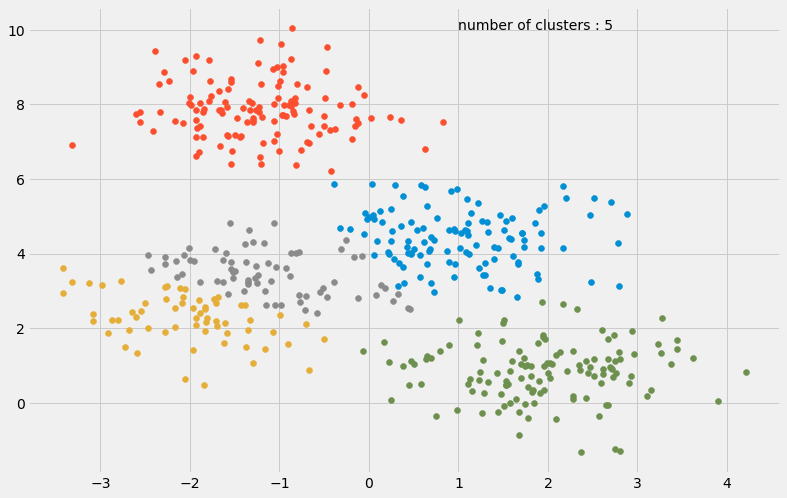

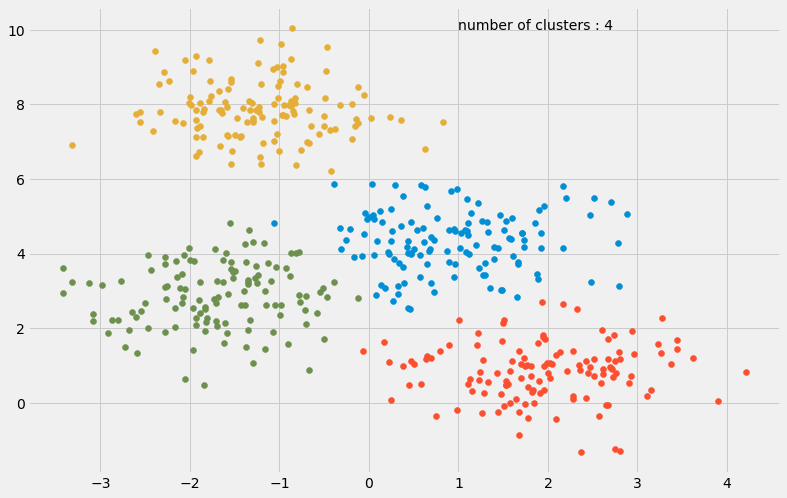

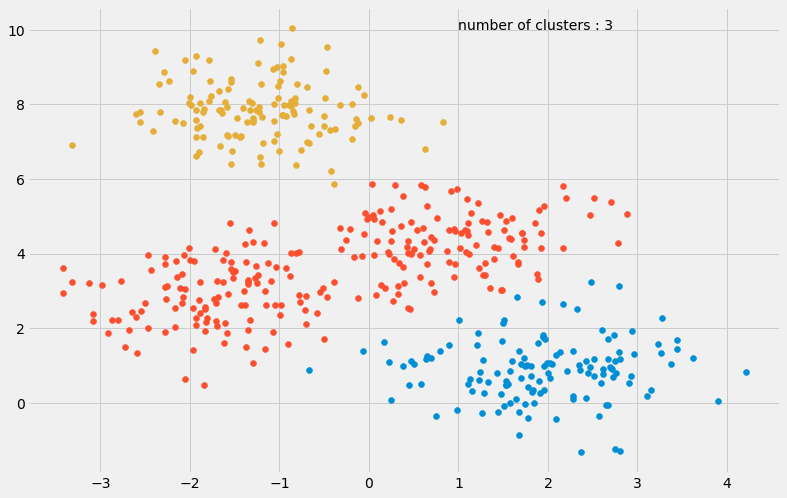

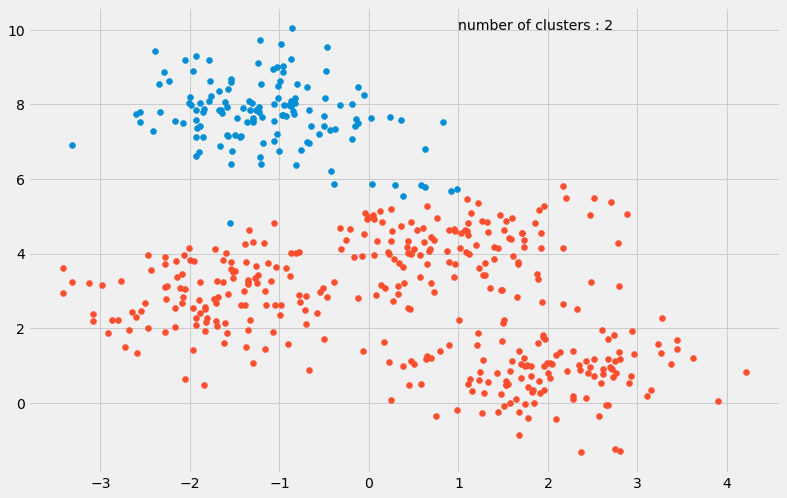

In [26]:
print('\n')
print('type\t\ttime\tR-Score\tAMI\tNMI\tHomo\tComp\tV-meas\tSilh\tCH-score  DB-score')
print(100 * '_')

clustering_fit_stats(KMeans(n_clusters= 5, random_state= 6), name="K-means5", data= X)
clustering_fit_stats(KMeans(n_clusters= 4, random_state= 6), name="K-means4", data= X)
clustering_fit_stats(KMeans(n_clusters= 3, random_state= 6), name="K-means3", data= X)
clustering_fit_stats(KMeans(n_clusters= 2, random_state= 6), name="K-means2", data= X)
print(2*"\n")

clustering_plot(KMeans(n_clusters= 5), X,5)
clustering_plot(KMeans(n_clusters= 4), X,4)
clustering_plot(KMeans(n_clusters= 3), X,3)
clustering_plot(KMeans(n_clusters= 2), X,2)



type		time	R-Score	AMI	NMI	Homo	Comp	V-meas	Silh	CH-score  DB-score
____________________________________________________________________________________________________
K-means  	0.058s	0.845	0.854	0.855	0.912	0.805	0.855	0.512	1032.629  0.786
Agglomerative	0.005s	0.922	0.904	0.905	0.905	0.905	0.905	0.575	1184.745  0.584
DBSCAN   	0.002s	0.729	0.738	0.741	0.814	0.680	0.741	0.367	263.681  2.322
HDBSCAN  	0.010s	0.615	0.688	0.690	0.652	0.732	0.690	0.467	386.568  3.382
GMM      	0.008s	0.953	0.933	0.933	0.933	0.933	0.933	0.583	1213.480  0.584





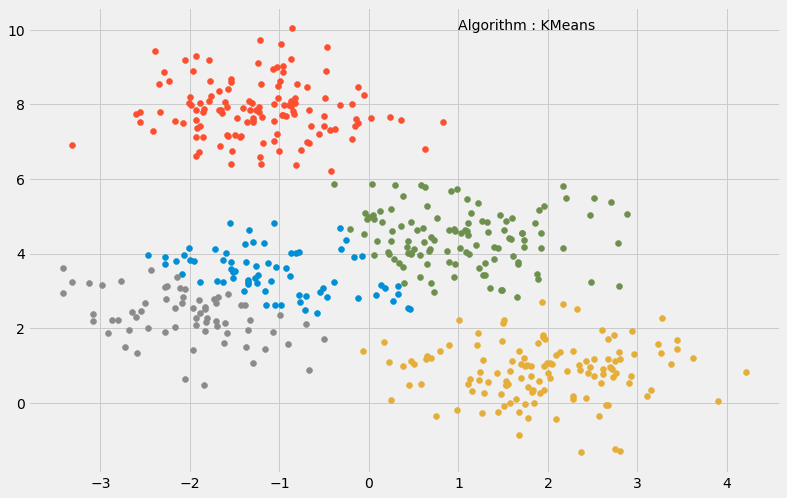

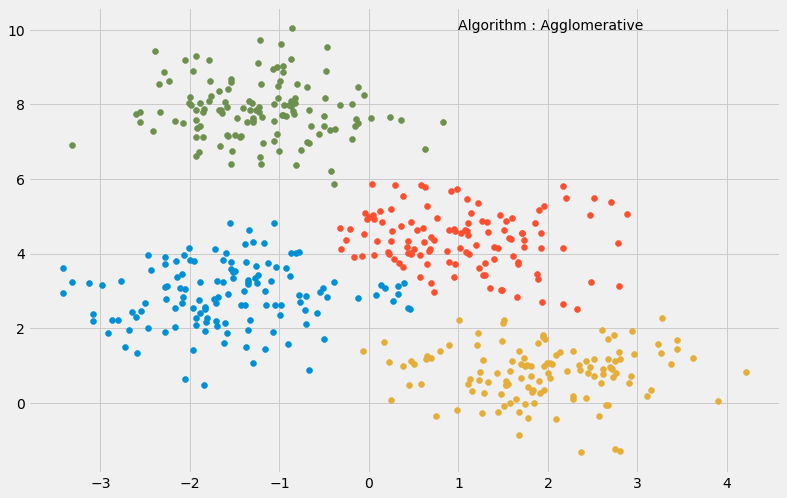

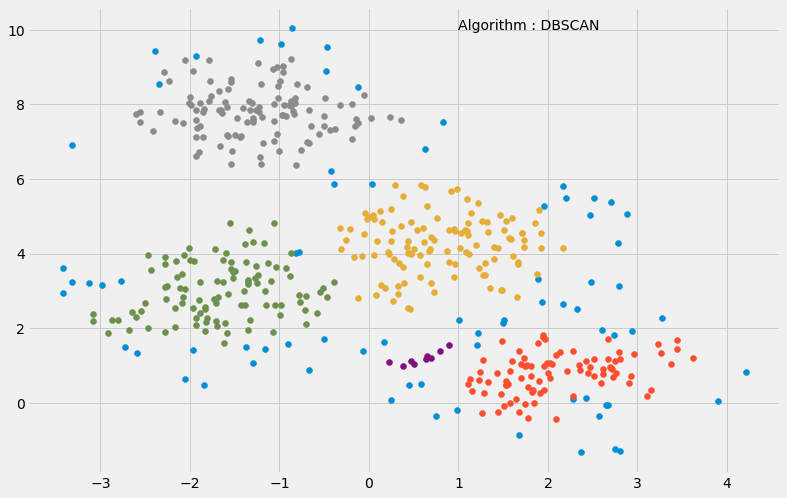

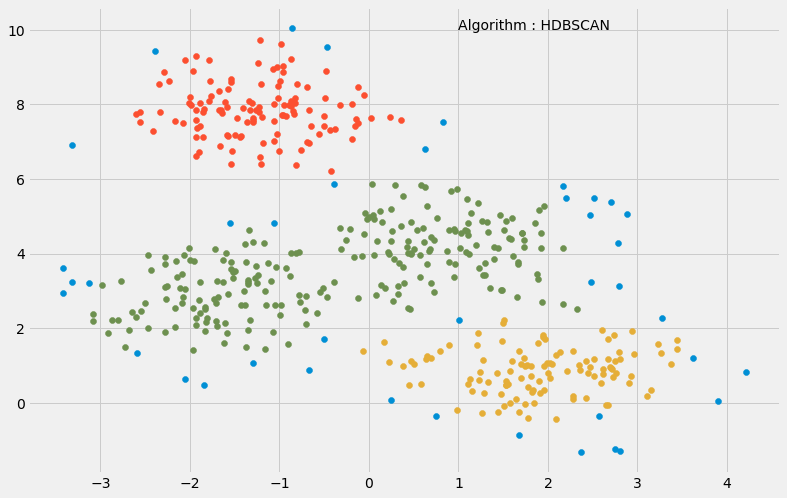

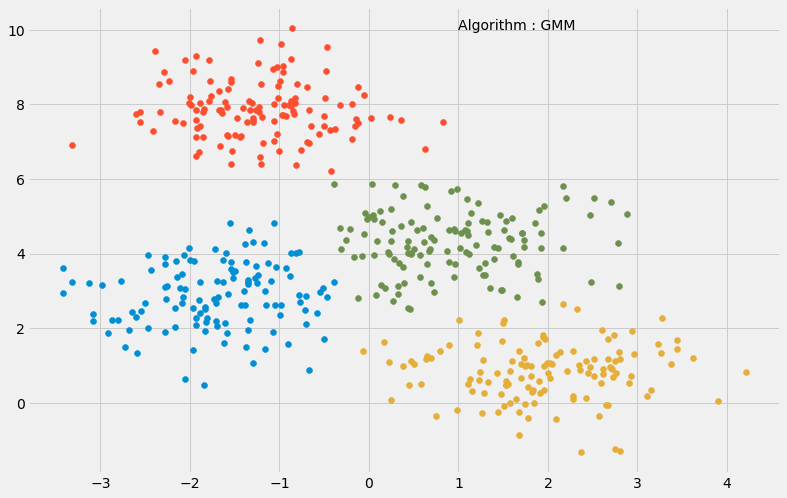

In [27]:
import hdbscan
print('\n')
print('type\t\ttime\tR-Score\tAMI\tNMI\tHomo\tComp\tV-meas\tSilh\tCH-score  DB-score')
print(100 * '_')

clustering_fit_stats(KMeans(n_clusters= 5, random_state= 6), name="K-means", data= X)
clustering_fit_stats(AgglomerativeClustering(n_clusters=4) , name="Agglomerative", data= X)
clustering_fit_stats(DBSCAN(eps= 0.4, min_samples= 6), name="DBSCAN", data= X)
clustering_fit_stats(hdbscan.HDBSCAN(min_cluster_size=10), name="HDBSCAN", data= X)
clustering_fit_stats(GaussianMixture(n_components= 4), name="GMM", data= X)
print(2*"\n")                     
clustering_plot(KMeans(n_clusters= 5), X,"KMeans",False)
clustering_plot(AgglomerativeClustering(n_clusters=4), X,"Agglomerative",False)
clustering_plot(DBSCAN(eps= 0.4, min_samples= 6), X,"DBSCAN",False)
clustering_plot( hdbscan.HDBSCAN(min_cluster_size=10), X,"HDBSCAN",False)
clustering_plot(GaussianMixture(n_components= 4), X,"GMM",False)


# Comparing Python Clustering Algorithms
#### (Why you should use HDBSCAN)

There are a lot of clustering algorithms to choose from. The standard `sklearn` clustering suite has thirteen different clustering classes alone. So what clustering algorithms should you be using? As with every question in data science and machine learning it depends on your data. A number of those thirteen classes in `sklearn` are specialised for certain tasks (such as co-clustering and bi-clustering, or clustering features instead data points). Obviously an algorithm specializing in text clustering is going to be the right choice for clustering text data, and other algorithms specialize in other specific kinds of data. Thus, if you know enough about your data, you can narrow down on the clustering algorithm that best suits that kind of data, or the sorts of important properties your data has, or the sorts of clustering you need done. All well and good, but what if you don't know much about your data? If, for example, you are 'just looking' and doing some exploratory data analysis (EDA) it is not so easy to choose a specialized algorithm. So, what algorithm is good for exploratory data analysis?

### Some rules for EDA clustering

To start, lets' lay down some ground rules of what we need a good EDA clustering algorithm to do, then we can set about seeing how the algorithms available stack up.

* **Don't be wrong!**: If you are doing EDA you are trying to learn and gain intuitions about your data. In that case it is far better to get no result at all than a result that is wrong. Bad results lead to false intuitions which in turn send you down completely the wrong path. Not only do you not understand your data, you *misunderstand* your data. This means a good EDA clustering algorithm needs to conservative in int's clustering; it should be willing to not assign points to clusters; it should not group points together unless they really are in a cluster; this is true of far fewer algorithms than you might think.
* **Intuitive Parameters**: All clustering algorithms have parameters; you need some knobs to turn to adjust things. The question is: how do you pick settings for those parameters? If you know little about your data it can be hard to determine what value or setting a parameter should have. This means parameters need to be intuitive enough that you can hopefully set them without having to know a lot about your data.
* **Stable Clusters**: If you run the algorithm twice with a different random initialization, you should expect to get roughly the same clusters back. If you are sampling your data, taking a different random sample shouldn't radically change the resulting cluster structure (unless your sampling has problems). If you vary the clustering algorithm parameters you want the clustering to change in a somewhat stable predictable fashion.
* **Performance**: Data sets are only getting bigger. You can sub-sample (but see *stability*), but ultimately you need a clustering algorithm that can scale to large data sizes. A clustering algorithm isn't much use if you can only use it if you take such a small sub-sample that it is no longer representative of the data at large!

There are other nice to have features like soft clusters, or overlapping clusters, but the above desiderata is enough to get started with because, oddly enough, very few clustering algorithms can satisfy them all!

## Getting set up

If we are going to compare clustering algorithms we'll need a few things; first some libraries to load and cluster the data, and second some visualisation tools so we can look at the results of clustering. 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline

style.use('dark_background')
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.75, 's' : 18, 'linewidths':0}

Next we need some data. In order to make this more interesting I've constructed an artificial dataset that will give clustering algorithms a challenge -- some non-globular clusters, some noise etc.; the sorts of things we expect to crop up in messy real-world data. So that we can actually visualize clusterings the dataset is two dimensional; this is not something we expect from real-world data where you generally can't just visualize and see what is going on.

In [25]:
data = np.load('clusterable_data.npy')

So let's have a look at the data and see what we have.

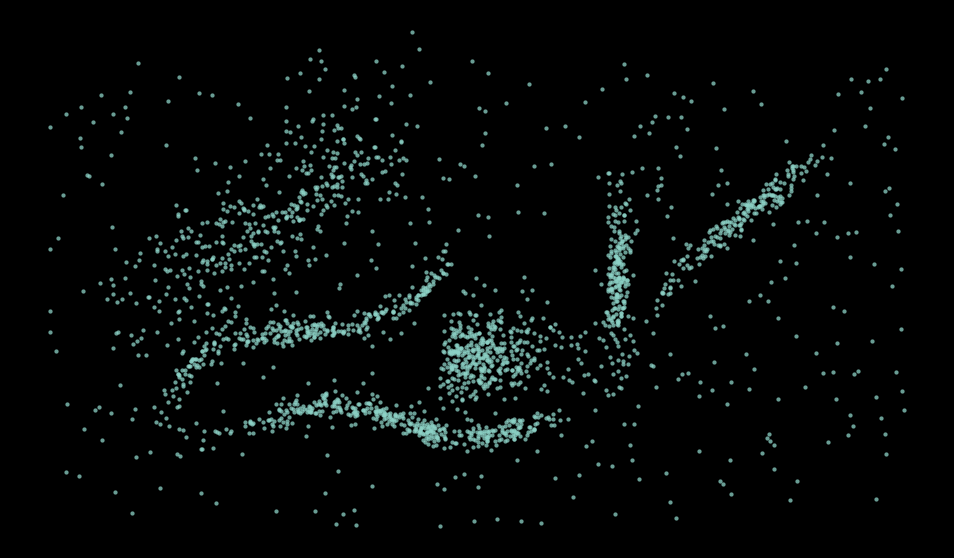

In [26]:

fig, ax = plt.subplots(figsize=(15,10))
ax.axis('off')
plt.scatter(data.T[0], data.T[1], **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

It's messy, but there are certainly some clusters that you can pick out by eye; determining the exact boundaries of those clusters is harder of course, but we can hope that our clustering algorithms will find at least some of those clusters. So, on to testing ...

## Testing Clustering Algorithms

To start let's set up a little utility function to do the clustering and plot the results for us. We can time the clustering algorithm while we're at it and add that to the plot since we do care about performance.

In [27]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('turbo', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.70, 0.70, 0.70) for x in labels]
    fig, ax = plt.subplots(figsize=(15,10))
    ax.axis('off')
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

Before we try doing the clustering, there are some things to keep in mind as we look at the results.

* In real use cases we *can't* look at the data and realise points are not really in a cluster; we have to take the clustering algorithm at its word.
* This is a small dataset, so poor performance here bodes very badly.

On to the clustering algorithms.

## K-Means

K-Means is the 'go-to' clustering algorithm for many simply because it is fast, easy to understand, and available everywhere (there's an implementation in almost any statistical or machine learning tool you care to use). K-Means has a few problems however. The first is that it isn't a clustering algorithm, it is a partitioning algorithm. That is to say K-means doesn't 'find clusters' it partitions your dataset into as many (assumed to be globular) chunks as you ask for by attempting to minimize intra-partition distances. That leads to the second problem: you need to specify exactly how many clusters you expect. If you know a lot about your data then that is something you might expect to know. If, on the other hand, you are simply exploring a new dataset then 'number of clusters' is a hard parameter to have any good intuition for. The usually proposed solution is to run K-Means for many different 'number of clusters' values and score each clustering with some 'cluster goodness' measure (usually a variation on intra-cluster vs inter-cluster distances) and attempt to find an 'elbow'. If you've ever done this in practice you know that finding said elbow is usually not so easy, nor does it necessarily correlate as well with the actual 'natural' number of clusters as you might like. Finally K-Means is also dependent upon initialization; give it multiple different random starts and you can get multiple different clusterings. This does not engender much confidence in any individual clustering that may result.

So, in summary, here's how K-Means seems to stack up against out desiderata:
* **Don't be wrong!**: K-means is going to throw points into clusters whether they belong or not; it also assumes you clusters are globular. K-Means scores very poorly on this point.
* **Intuitive parameters**: If you have a good intuition for how many clusters the dataset your exploring has then great, otherwise you might have a problem.
* **Stability**: Hopefully the clustering is stable for your data. Best to have many runs and check though.
* **Performance**: This is K-Means big win. It's a simple algorithm and with the right tricks and optimizations can be made exceptionally efficient. There are few algorithms that can compete with K-Means for performance. If you have truly huge data then K-Means might be your only option.

But enough opinion, how does K-Means perform on our test dataset? Let's have look. We'll be generous and use our knowledge that there are six natural clusters and give that to K-Means.

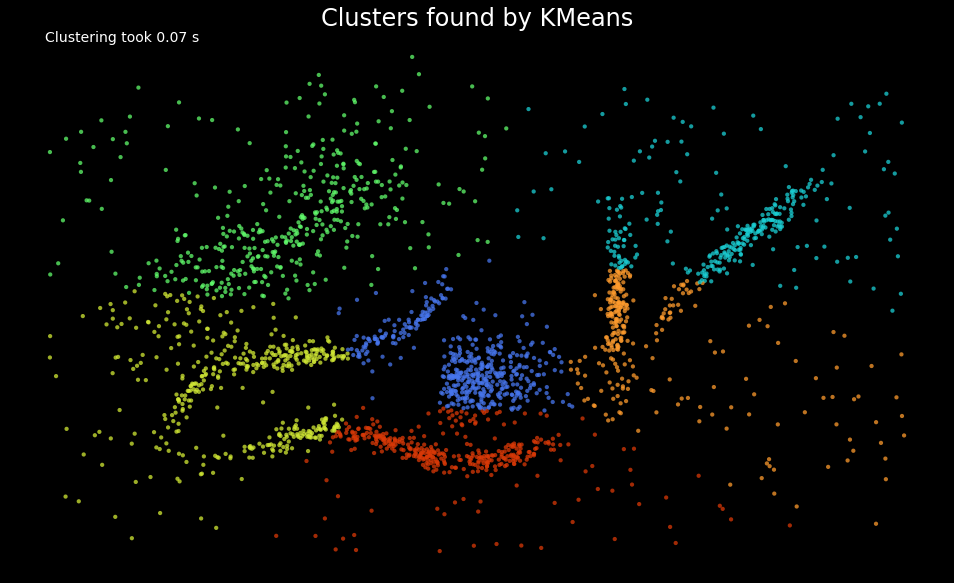

In [28]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

We see some interesting results. First, the assumption of perfectly globular clusters means that the natural clusters have been spliced and clumped into various more globular shapes. Worse, the noise points get lumped into clusters as well: in some cases, due to where relative cluster centers ended up, points very distant from a cluster get lumped in. Having noise pollute your clusters like this is particularly bad in an EDA world since they can easily mislead your intuition and understanding of the data. On a more positive note we completed clustering very quickly indeed, so at least we can be wrong quickly.

#### Affinity Propagation

Affinity Propagation is a newer clustering algorithm that uses a graph based approach to let points 'vote' on their preferred 'exemplar'. The end result is a set of cluster 'exemplars' from which we derive clusters by essentially doing what K-Means does and assigning each point to the cluster of it's nearest exemplar. Affinity Propagation has some advantages over K-Means. First of all the graph based exemplar voting means that the user doesn't need to specify the number of clusters. Second, due to how the algorithm works under the hood with the graph representation it allows for non-metric dissimilarities (i.e. we can have dissimilarities that don't obey the triangle inequality, or aren't symmetric). This second point is important if you are ever working with data isn't naturally embedded in a metric space of some kind; few clustering algorithms support, for example, non-symmetric dissimilarities. Finally Affinity Propagation does, at least, have better stability over runs (but not over parameter ranges!).

The weak points of Affinity Propagation are similar to K-Means. Since it partitions the data just like K-Means we expect to see the same sorts of problems, particularly with noisy data. While Affinity Propagation eliminates the need to specify the number of clusters, it has 'preference' and 'damping' parameters. Picking these parameters well can be difficult. The implementation in `sklearn` default preference to the median dissimilarity. This tends to result in a very large number of clusters. A better value is something smaller (or negative) but data dependent. Finally Affinity Propagation is *slow*; since it supports non-metric dissimilarities it can't take any of the shortcuts available to other algorithms, and the basic operations are expensive as data size grows.

So, in summary, over our desiderata we have:

* **Don't be wrong**: The same issues as K-Means; Affinity Propagation is going to throw points into clusters whether they belong or not; it also assumes you clusters are globular.
* **Intuitive Parameters**: It can be easier to guess at preference and damping than number of clusters, but since Affinity Propagation is quite sensitive to preference values it can be fiddly to get "right". This isn't really that much of an improvement over K-Means.
* **Stability**: Affinity Propagation is deterministic over runs.
* **Performance**: Affinity Propagation tends to be very slow. In practice running it on large datasets is essentially impossible without a carefully crafted and optimized implementation (i.e. not the default one available in `sklearn`).

And how does it look in practice on our chosen dataset? I've tried to select a preference and damping value that gives a reasonable number of clusters (in this case six) but feel free to play with the parameters yourself and see if you can come up with a better clustering.

C:\Users\PAYTAKHT\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


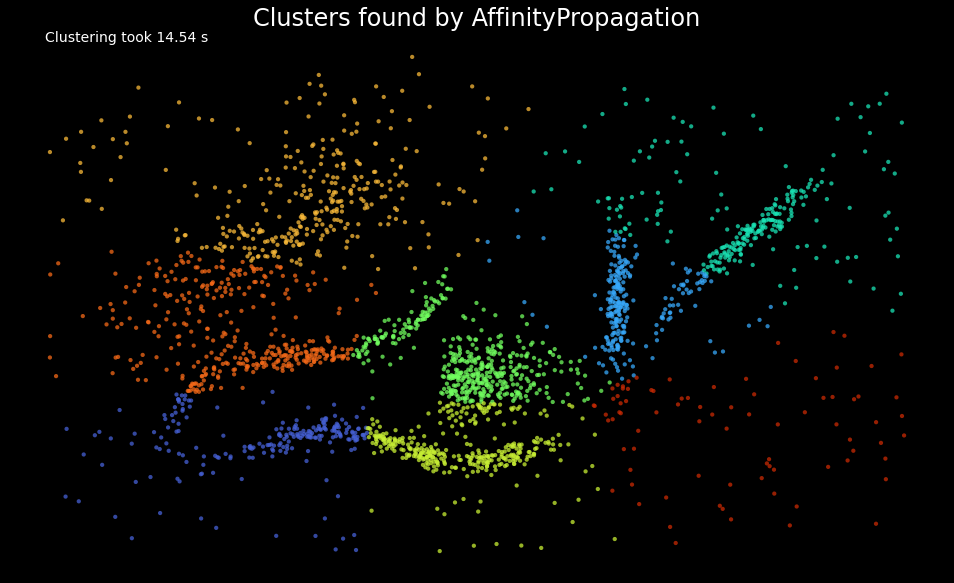

In [29]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

The result is eerily similar to K-Means and has all the same problems. The globular clusters have lumped together splied parts of various 'natural' clusters. The noise points have been assigned to clusters regardless of being significant outliers. In other words, we'll have a very poor intuitive understanding of our data based on these 'clusters'. Worse still it took us several seconds to arrive at this unenlightening conclusion.

#### Mean Shift

Mean shift is another option if you don't want to have to specify the number of clusters. It is centroid based, like K-Means and affinity propagation, but can return clusters instead of a partition. The underlying idea of the Mean Shift algorithm is that there exists some probability density function from which the data is drawn, and tries to place centroids of clusters at the maxima of that density function. It approximates this via kernel density estimation techniques, and the key parameter is then the bandwidth of the kernel used. This is easier to guess than the number of clusters, but may require some staring at, say, the distributions of pairwise distances between data points to choose successfully. The other issue (at least with the sklearn implementation) is that it is fairly slow depsite potentially having good scaling!

How does Mean Shift fare against out criteria? In principle proming, but in practice ...

* **Don't be wrong!**: Mean Shift doesn't cluster every point, but it still aims for globular clusters, and in practice it can return less than ideal results (see below for example). Without visual validation it can be hard to know how wrong it may be.
* **Intuitive parameters**: Mean Shift has more intuitive and meaningful parameters; this is certainly a strength.
* **Stability**: Mean Shift results can vary a lot as you vary the bandwidth parameter (which can make selection more difficult than it first appears. It also has a random initialisation, which means stability under runs can vary (if you reseed the random start).
* **Performance**: While Mean Shift has good scalability in principle (using ball trees) in practice the sklearn implementation is slow; this is a serious weak point for Mean Shift.

Let's see how it works on some actual data. I spent a while trying to find a good bandwidth value that resulted in a reasonable clustering. The choice below is about the best I found.

C:\Users\PAYTAKHT\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass bandwidth=0.175 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


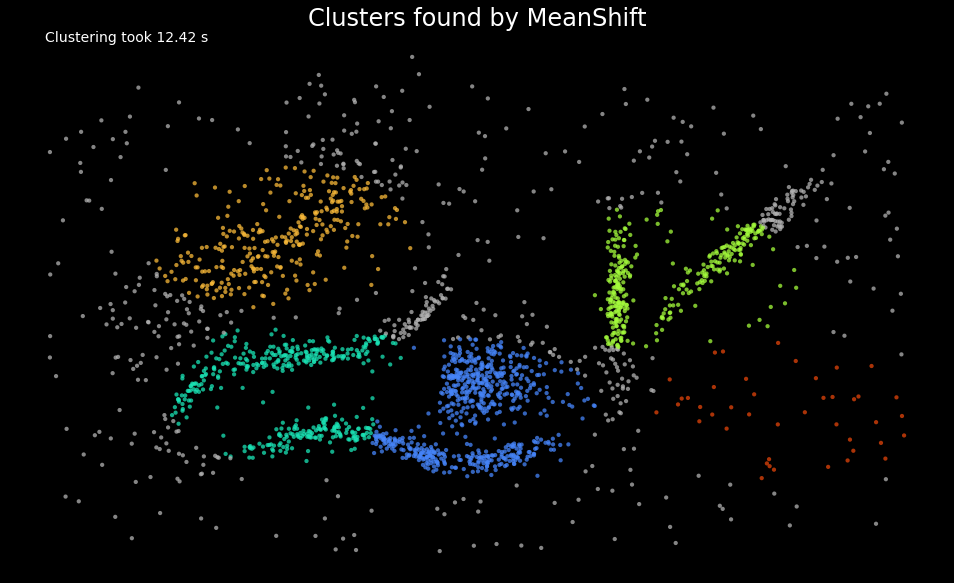

In [30]:
plot_clusters(data, cluster.MeanShift, (0.175,), {'cluster_all':False})

We at least aren't polluting our clusters with as much noise, but we certainly have dense regions left as noise and clusters that run across and split what seem like natural clusters. There is also the outlying yellow cluster group that doesn't make a lot of sense. Thus while Mean Shift had good promise, and is certainly better than K-Means, it's still short of our desiderata. Worse still it took over 4 seconds to cluster this small dataset!

#### Spectral Clustering

Spectral clustering can best be thought of as a graph clustering. For spatial data one can think of inducing a graph based on the distances between points (potentially a k-NN graph, or even a dense graph). From there spectral clustering will look at the eigenvectors of the Laplacian of the graph to attempt to find a good (low dimensional) embedding of the graph into Euclidean space. This is essentially a kind of manifold learning, finding a transformation of our original space so as to better represent manifold distances for some manifold that the data is assumed to lie on. Once we have the transformed space a standard clustering algorithm is run; with `sklearn` the default is K-Means. That means that the key for spectral clustering is the transformation of the space. Presuming we can better respect the manifold we'll get a better clustering -- we need worry less about K-Means globular clusters as they are merely globular on the transformed space and not the original space. We unfortunately retain some of K-Means weaknesses: we still partition the data instead of clustering it; we have the hard to guess 'number of clusters' parameter; we have stability issues inherited from K-Means. Worse, if we operate on the dense graph of the distance matrix we have a very expensive initial step and sacrifice performance.

So, in summary:

* **Don't be wrong!**: We are less wrong, in that we don't have a purely globular cluster assumption; we do still have partitioning and hence are polluting clusters with noise, messing with our understanding of the clusters and hence the data.
* **Intuitive parameters**: We are no better than K-Means here; we have to know the correct number of clusters, or hope to guess by clustering over a range of parameter values and finding some way to pick the 'right one'.
* **Stability**: Slightly more stable than K-Means due to the transformation, but we still suffer from those issues.
* **Performance**: For spatial data we don't have a sparse graph (unless we prep one ourselves) so the result is a somewhat slower algorithm.

Let's have a look at how it operates on our test dataset. Again, we'll be generous and give it the six clusters to look for.

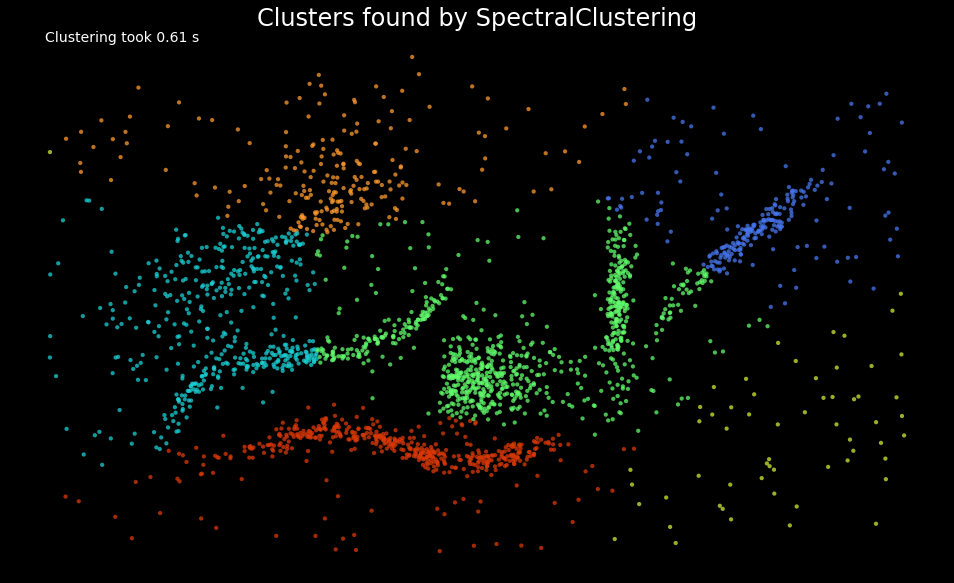

In [31]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

Spectral clustering performed *better* on the long thin clusters, but still ended up cutting some of them strangely and dumping parts of them in with other clusters. We also still have the issue of noise points polluting our clusters, so again our intuitions are going to be led astray. Performance was a distinct improvement of Affinity Propagation however. Over all we are doing better, but are still a long way from achieving our desiderata.

#### Agglomerative Clustering

Agglomerative clustering is really a suite of algorithms all based on the same idea. The fundamental idea is that you start with each point in it's own cluster and then, for each cluster, use some criterion to choose another cluster to merge with. Do this repeatedly until you have only one cluster and you get get a hierarchy, or binary tree, of clusters branching down to the last layer which has a leaf for each point in the dataset. The most basic version of this, single linkage, chooses the closest cluster to merge, and hence the tree can be ranked by distance as to when clusters merged/split. More complex variations use things like mean distance between clusters, or distance between cluster centroids etc. to determine which cluster to merge. Once you have a cluster hierarchy you can choose a level or cut (according to some criteria) and take the clusters at that level of the tree. For `sklearn` we usually choose a cut based on a 'number of clusters' parameter passed in.

The advantage of this approach is that clusters can grow 'following the underlying manifold' rather than being presumed to be globular. You can also inspect the dendrogram of clusters and get more information about how clusters break down. On the other hand, if you want a flat set of clusters you need to choose a cut of the dendrogram, and that can be hard to determine. You can take the `sklearn` approach and specify a number of clusters, but as we've already discussed that isn't a particularly intuitive parameter when you're doing EDA. You can look at the dendrogram and try to pick a natural cut, but this is similar to finding the 'elbow' across varying `k` values for K-Means: in principle it's fine, and the textbook examples always make it look easy, but in practice on messy real world data the 'obvious' choice is often far from obvious. We are also still partitioning rather than clustering the data, so we still have that persistent issue of noise polluting our clusters. Fortunately performance can be pretty good; the `sklearn` implementation is fairly slow, but [`fastcluster`](https://pypi.python.org/pypi/fastcluster) provides high performance agglomerative clustering if that's what you need.

So, in summary:

* **Don't be wrong!**: We have gotten rid of the globular assumption, but we are still assuming that all the data belongs in clusters with no noise.
* **Intuitive parameters**: Similar to K-Means we are stuck choosing the number of clusters (not easy in EDA), or trying to discern some natural parameter value from a plot that may or may not have any obvious natural choices.
* **Stability**: Agglomerative clustering is stable across runs and the dendrogram shows how it varies over parameter choices (in a reasonably stable way), so stability is a strong point.
* **Performance**: Performance can be good if you get the right implementation.

So, let's see it clustering data. I chose to provide the correct number of clusters (six) and use Ward as the linkage/merge method. This is a more robust method than say single linkage, but it does tend toward more globular clusters.

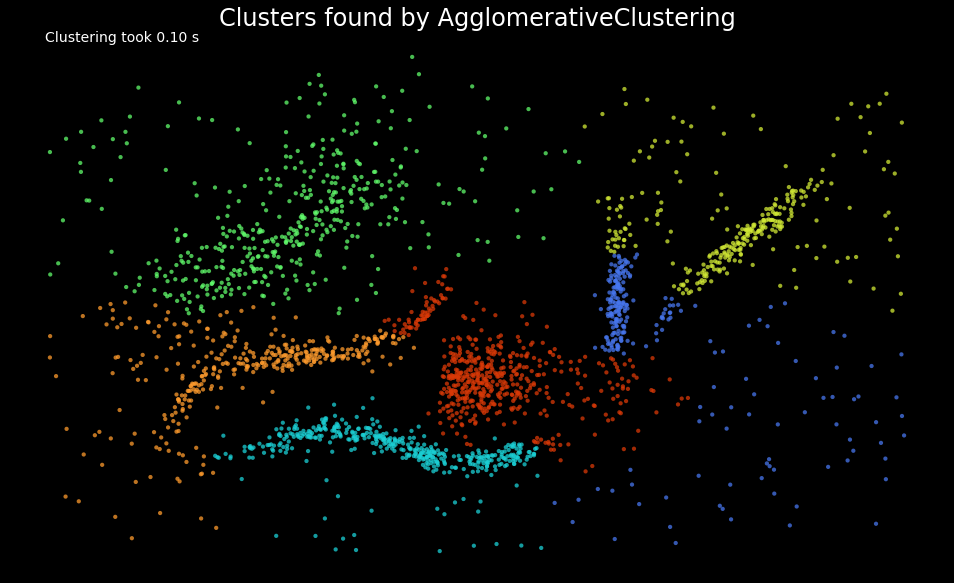

In [32]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

Similar to the spectral clustering we have handled the long thin clusters much better than K-Means or Affinity Propagation. We in fact improved on spectral clustering a bit on that front. We do still have clusters that contain parts of several different natural clusters, but those 'mis-clusterings' are smaller. We also still have all the noise points polluting our clusters. The end result is probably the best clustering we've seen so far, but given the mis-clustering and noise issues we are still not going to get as good an intuition for the data as we might reasonably hope for.

## DBSCAN

DBSCAN is a density based algorithm -- it assumes clusters for dense regions. It is also the first actual clustering algorithm we've looked at: it doesn't require that every point be assigned to a cluster and hence doesn't partition the data, but instead extracts the 'dense' clusters and leaves sparse background classified as 'noise'. In practice DBSCAN is related to agglomerative clustering. As a first step DBSCAN transforms the space according to the density of the data: points in dense regions are left alone, while points in sparse regions are moved further away. Applying single linkage clustering to the transformed space results in a dendrogram, which we cut according to a distance parameter (called epsilon or `eps` in many implementations) to get clusters. Importantly any singleton clusters at that cut level are deemed to be 'noise' and left unclustered. This provides several advantages: we get the manifold following behaviour of agglomerative clustering, and we get actual clustering as opposed to partitioning. Better yet, since we can frame the algorithm in terms of local region queries we can use various tricks such as kdtrees to get exceptionally good performance and scale to dataset sizes that are otherwise unapproachable with algorithms other than K-Means. There are some catches however. Obviously epsilon can be hard to pick; you can do some data analysis and get a good guess, but the algorithm can be quite sensitive to the choice of the parameter. The density based transformation depends on another parameter (`min_samples` in `sklearn`). Finally the combination of `min_samples` and `eps` amounts to a choice of density and the clustering only finds clusters at or above that density; if your data has variable density clusters then DBSCAN is either going to miss them, split them up, or lump some of them together depending on your parameter choices.

So, in summary:

* **Don't be wrong!**: Clusters don't need to be globular, and won't have noise lumped in; varying density clusters may cause problems, but that is more in the form of insufficient detail rather than explicitly wrong. DBSCAN is the first clustering algorithm we've looked at that actually meets the 'Don't be wrong!' requirement.
* **Intuitive parameters**: Epsilon is a distance value, so you can survey the distribution of distances in your dataset to attempt to get an idea of where it should lie. In practice, however, this isn't an especially intuitive parameter, nor is it easy to get right.
* **Stability**: DBSCAN is stable across runs (and to some extent subsampling if you re-parameterize well); stability over varying epsilon and min samples is not so good.
* **Performance**: This is DBSCAN's other great strength; few clustering algorithms can tackle datasets as large as DBSCAN can.

So how does it cluster our test dataset? I played with a few epsilon values until I got somethign reasonable, but there was little science to this -- getting the parameters right can be hard.

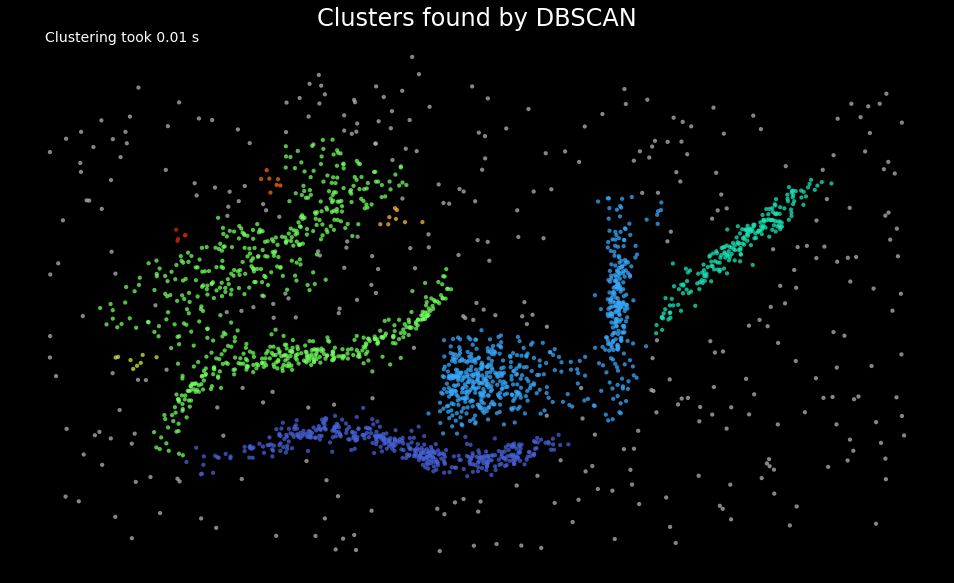

In [33]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

This is a pretty decent clustering; we've lumped natural clusters together a couple of times, but at least we didn't carve them up to do so. We also picked up a few tiny clusters in amongst the large sparse cluster. These problems are artifacts of not handling variable density clusters -- to get the sparser clusters to cluster we end up lumping some of the denser clusters with them; in the meantime the very sparse cluster is still broken up into several clusters. All in all we're finally doing a decent job, but there's still plenty of room for improvement.

#### HDBSCAN

HDBSCAN is a recent algorithm developed by some of the same people who write the original DBSCAN paper. Their goal was to allow varying density clusters. The algorithm starts off much the same as DBSCAN: we transform the space according to density, exactly as DBSCAN does, and perform single linkage clustering on the transformed space. Instead of taking an epsilon value as a cut level for the dendrogram however, a different approach is taken: the dendrogram is condensed by viewing splits that result in a small number of points splitting off as points 'falling out of a cluster'. This results in a smaller tree with fewer clusters that 'lose points'. That tree can then be used to select the most stable or persistent clusters. This process allows the tree to be cut at varying height, picking our varying density clusters based on cluster stability. The immediate advantage of this is that we can ave varying density clusters; the second benefit is that we have eliminated the epsilon parameter as we no longer need it to choose a cut of the dendrogram. Instead we have a new parameter `min_cluster_size` which is used to determine whether points are 'falling out of a cluster' or splitting to form two new clusters. This trades an unintuitive parameter for one that is not so hard to choose for EDA (what is the minimum size cluster I am willing to care about?).

So, in summary:

* **Don't be wrong!**: We inherited all the benefits of DBSCAN and removed the varying density clusters issue. HDBSCAN is easily the strongest option on the 'Don't be wrong!' front.
* **Intuitive parameters**: Choosing a mimnimum cluster size is very reasonable. The only remaining parameter is `min_samples` inherited from DBSCAN for the density based space transformation. Sadly `min_samples` is not that intuitive; HDBSCAN is not that sensitive to it and we can choose some sensible defaults, but this remains the biggest weakness of the algorithm.
* **Stability**: HDBSCAN is stable over runs and subsampling (since the variable density clustering will still cluster sparser subsampled clusters with the same parameter choices), and has good stability over parameter choices.
* **Performance**: When implemented well HDBSCAN can be very efficient. The current implementation has similar performance to `fastcluster`'s agglomerative clustering (and will use `fastcluster` if it is available), but we expect future implementations that take advantage of newer data structure such as cover trees to scale significantly better.

How does HDBSCAN perform on our test dataset? Unfortunately HDBSCAN is not part of `sklearn`. Fortunately we can just import the [hdbscan library](https://github.com/scikit-learn-contrib/hdbscan) and use it as if it were part of `sklearn`.

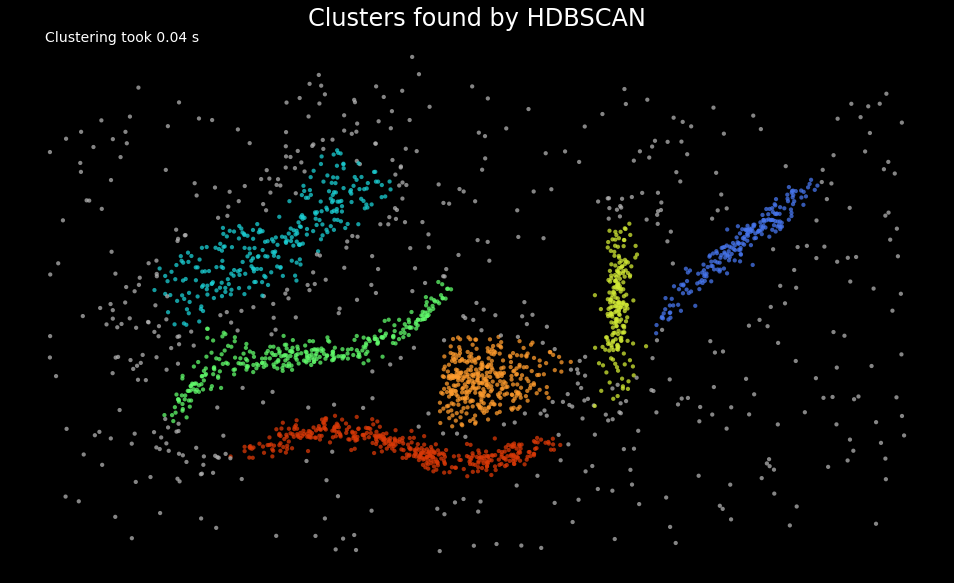

In [34]:
import hdbscan
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})

I think the picture speaks for itself.